Setup Kaggle API and Download Dataset to Google Colab

In [1]:
!pip install -q kaggle

In [2]:
from google.colab import files
files.upload()

Saving kaggle (1).json to kaggle (1).json


{'kaggle (1).json': b'{"username":"karimeletriby","key":"c46054321d0d4b856502b60765b883e9"}'}

In [3]:
!mkdir -p ~/.kaggle

In [4]:
!cp "kaggle (1).json" ~/.kaggle/kaggle.json

In [5]:
!chmod 600 ~/.kaggle/kaggle.json

In [6]:
!kaggle datasets download -d mennaahmed23/baby-crying-dataset

Dataset URL: https://www.kaggle.com/datasets/mennaahmed23/baby-crying-dataset
License(s): unknown
 99% 534M/541M [00:01<00:00, 337MB/s]
100% 541M/541M [00:01<00:00, 439MB/s]


In [7]:
!unzip baby-crying-dataset.zip

Streaming output truncated to the last 5000 lines.
  inflating: Baby crying/cold_hot/cold_hot_aug_256.wav  
  inflating: Baby crying/cold_hot/cold_hot_aug_257.wav  
  inflating: Baby crying/cold_hot/cold_hot_aug_258.wav  
  inflating: Baby crying/cold_hot/cold_hot_aug_259.wav  
  inflating: Baby crying/cold_hot/cold_hot_aug_260.wav  
  inflating: Baby crying/cold_hot/cold_hot_aug_261.wav  
  inflating: Baby crying/cold_hot/cold_hot_aug_262.wav  
  inflating: Baby crying/cold_hot/cold_hot_aug_263.wav  
  inflating: Baby crying/cold_hot/cold_hot_aug_264.wav  
  inflating: Baby crying/cold_hot/cold_hot_aug_265.wav  
  inflating: Baby crying/cold_hot/cold_hot_aug_266.wav  
  inflating: Baby crying/cold_hot/cold_hot_aug_267.wav  
  inflating: Baby crying/cold_hot/cold_hot_aug_268.wav  
  inflating: Baby crying/cold_hot/cold_hot_aug_269.wav  
  inflating: Baby crying/cold_hot/cold_hot_aug_270.wav  
  inflating: Baby crying/cold_hot/cold_hot_aug_271.wav  
  inflating: Baby crying/cold_hot/col

install Libraries





In [8]:

!pip install librosa numpy matplotlib

#  Librosa is a Python library for audio analysis — it helps with loading audio files,
#  extracting features (like MFCCs, spectrograms, and chroma), and visualizing sound data


dataset details (distribution analysis)

In [9]:
import os

base_dir = "/content/Baby crying"

class_counts = {}
for label in os.listdir(base_dir):
    label_path = os.path.join(base_dir, label)
    if os.path.isdir(label_path):
        num_files = len([f for f in os.listdir(label_path) if f.endswith(".wav")])
        class_counts[label] = num_files

print("Class distribution:")
for label, count in class_counts.items():
    print(f"{label}: {count} files")

print("\nTotal files:", sum(class_counts.values()))
print("Total classes:", len(class_counts))

Class distribution:
lonely: 750 files
cold_hot: 750 files
laugh: 750 files
belly pain: 750 files
hungry: 750 files
burping: 247 files
tired: 752 files
discomfort: 750 files
scared: 750 files

Total files: 6249
Total classes: 9


Remove inappropriate categories

In [10]:
import shutil
import os

base_path = "/content/Baby crying"

folders_to_delete = ["lonely", "laugh"]

for folder in folders_to_delete:
    folder_path = os.path.join(base_path, folder)
    if os.path.exists(folder_path):
        shutil.rmtree(folder_path)
        print(f"🗑️ Deleted folder: {folder_path}")
    else:
        print(f"⚠️ Folder not found: {folder_path}")

print("✅ Deletion complete.")

# shutil => Provides high-level file operations like copying, moving, and deleting directorie
# os =>  Allows interaction with the operating system, such as file paths and environment management

🗑️ Deleted folder: /content/Baby crying/lonely
🗑️ Deleted folder: /content/Baby crying/laugh
✅ Deletion complete.


In [11]:
import os

base_dir = "/content/Baby crying"

class_counts = {}
for label in os.listdir(base_dir):
    label_path = os.path.join(base_dir, label)
    if os.path.isdir(label_path):
        num_files = len([f for f in os.listdir(label_path) if f.endswith(".wav")])
        class_counts[label] = num_files

print("Class distribution:")
for label, count in class_counts.items():
    print(f"{label}: {count} files")

print("\nTotal files:", sum(class_counts.values()))
print("Total classes:", len(class_counts))

Class distribution:
cold_hot: 750 files
belly pain: 750 files
hungry: 750 files
burping: 247 files
tired: 752 files
discomfort: 750 files
scared: 750 files

Total files: 4749
Total classes: 7


In [12]:
import os
import pandas as pd

dataset_path = '/content/Baby crying'

audio_files = []
labels = []

for root, dirs, files in os.walk(dataset_path):
    for file in files:
        if file.endswith('.wav') or file.endswith('.mp3'):
            file_path = os.path.join(root, file)
            audio_files.append(file_path)
            label = os.path.basename(root)
            labels.append(label)

df = pd.DataFrame({
    'file_path': audio_files,
    'label': labels
})

print(f"Total audio files: {len(audio_files)}")
print(f"\nClass distribution:")
print(df['label'].value_counts())

Total audio files: 4749

Class distribution:
label
tired         752
belly pain    750
cold_hot      750
hungry        750
discomfort    750
scared        750
burping       247
Name: count, dtype: int64


 **Exploratory Data Analysis (EDA)**

Analyze Audio File Properties

In [13]:
import librosa
import librosa.display
from tqdm import tqdm

sample_info = []

for label in df['label'].unique():
    samples = df[df['label'] == label].sample(min(10, len(df[df['label'] == label])))

    for _, row in samples.iterrows():
        try:
            audio, sr = librosa.load(row['file_path'], sr=None)
            duration = librosa.get_duration(y=audio, sr=sr)

            sample_info.append({
                'label': label,
                'sample_rate': sr,
                'duration': duration,
                'samples': len(audio)
            })
        except Exception as e:
            print(f"Error in file: {row['file_path']}")
            print(f"Error: {e}")

audio_df = pd.DataFrame(sample_info)

print("Audio Files Statistics:")
print(f"\nSample Rate Distribution:")
print(audio_df['sample_rate'].value_counts())
print(f"\nDuration Statistics (seconds):")
print(audio_df['duration'].describe())

#This script analyzes a dataset of audio files and extracts useful statistics such as sample rate, duration, and number of samples for each class label.

Audio Files Statistics:

Sample Rate Distribution:
sample_rate
16000    69
22050     1
Name: count, dtype: int64

Duration Statistics (seconds):
count    70.0
mean      4.0
std       0.0
min       4.0
25%       4.0
50%       4.0
75%       4.0
max       4.0
Name: duration, dtype: float64


Visualize Duration Distribution

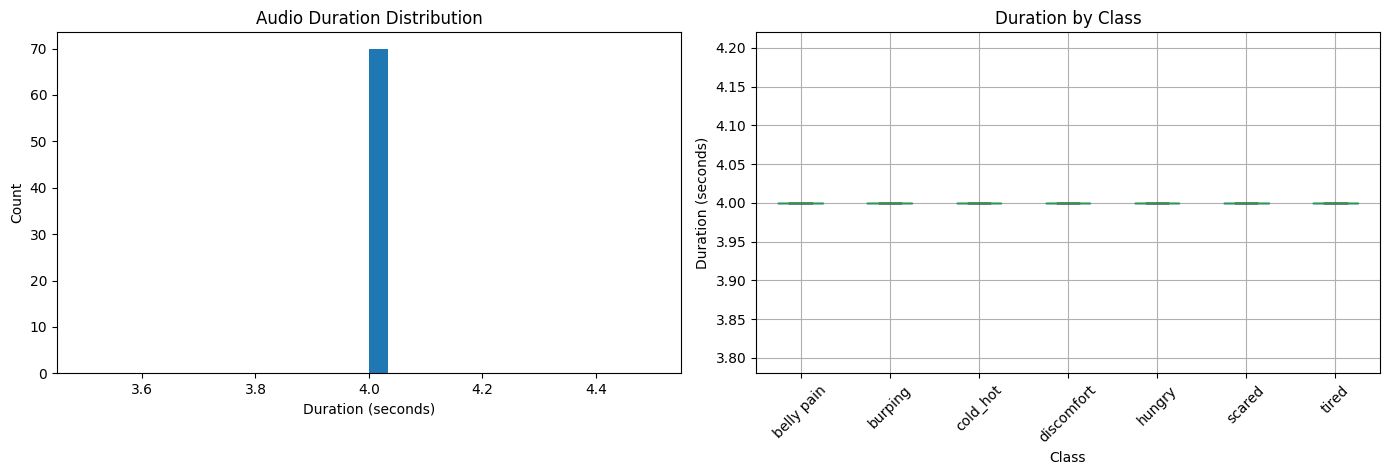

In [14]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(1, 2, figsize=(14, 5))

axes[0].hist(audio_df['duration'], bins=30)
axes[0].set_xlabel('Duration (seconds)')
axes[0].set_ylabel('Count')
axes[0].set_title('Audio Duration Distribution')

audio_df.boxplot(column='duration', by='label', ax=axes[1])
axes[1].set_xlabel('Class')
axes[1].set_ylabel('Duration (seconds)')
axes[1].set_title('Duration by Class')
axes[1].get_figure().suptitle('')
plt.setp(axes[1].xaxis.get_majorticklabels(), rotation=45)

plt.tight_layout()
plt.show()

Display Waveforms for Each Class

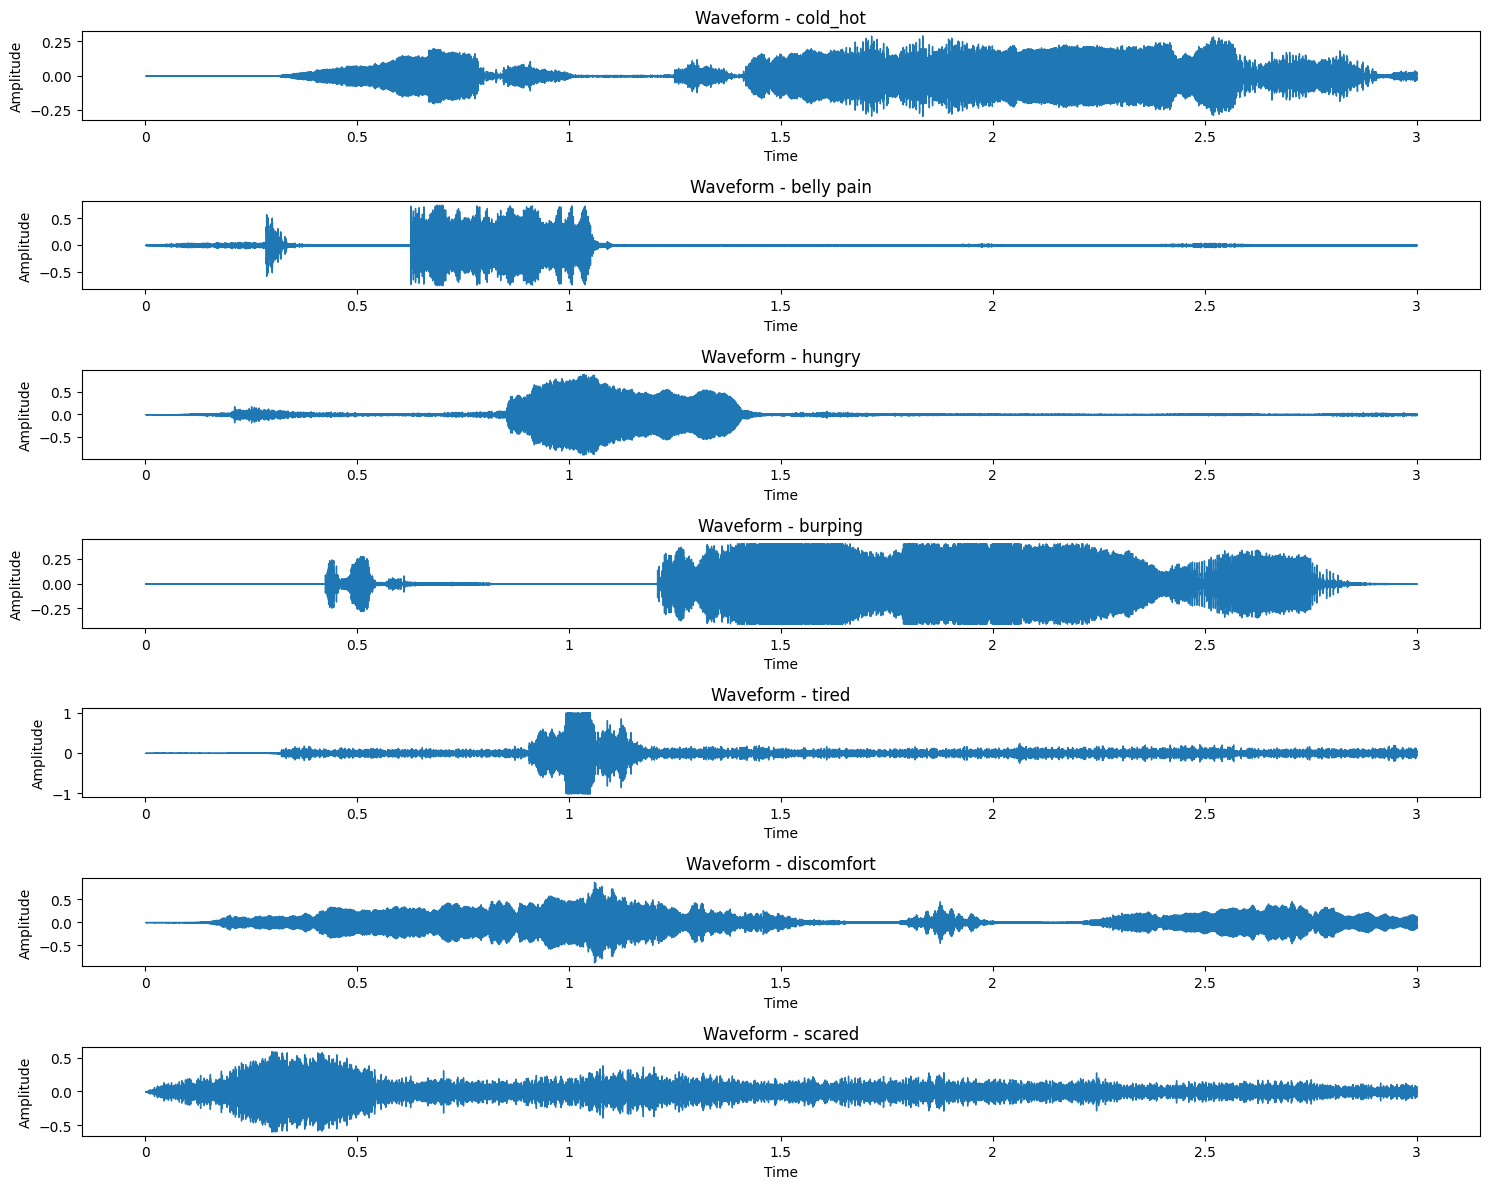

In [15]:
import numpy as np

fig, axes = plt.subplots(7, 1, figsize=(15, 12))

for idx, label in enumerate(df['label'].unique()):
    sample_file = df[df['label'] == label].iloc[0]['file_path']

    audio, sr = librosa.load(sample_file, sr=16000, duration=3)

    librosa.display.waveshow(audio, sr=sr, ax=axes[idx])
    axes[idx].set_title(f'Waveform - {label}')
    axes[idx].set_xlabel('Time')
    axes[idx].set_ylabel('Amplitude')

plt.tight_layout()
plt.show()

Display Mel Spectrograms for Each Class

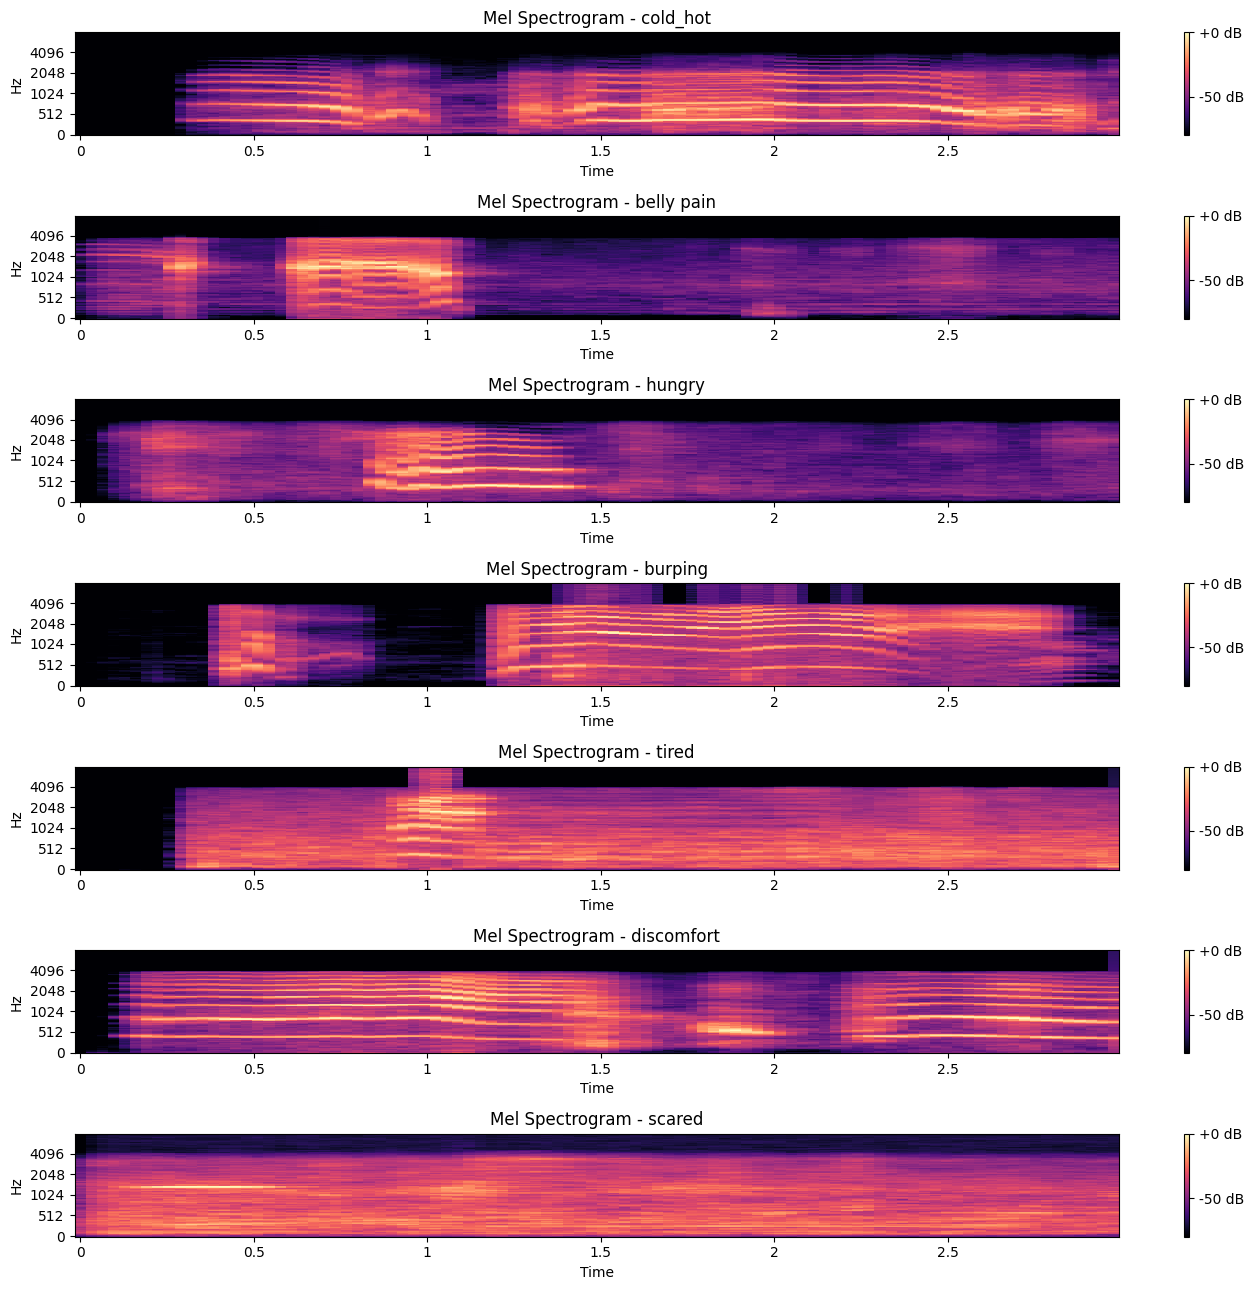

In [16]:
fig, axes = plt.subplots(7, 1, figsize=(14, 13))

for idx, label in enumerate(df['label'].unique()):
    sample_file = df[df['label'] == label].iloc[0]['file_path']

    audio, sr = librosa.load(sample_file, sr=16000, duration=3)

    mel_spec = librosa.feature.melspectrogram(y=audio, sr=sr, n_mels=128)
    mel_spec_db = librosa.power_to_db(mel_spec, ref=np.max)

    img = librosa.display.specshow(mel_spec_db, sr=sr, x_axis='time', y_axis='mel', ax=axes[idx])
    axes[idx].set_title(f'Mel Spectrogram - {label}')
    fig.colorbar(img, ax=axes[idx], format='%+2.0f dB')

plt.tight_layout()
plt.show()

Preprocessing - Fixed Length Audio

In [17]:
SAMPLE_RATE = 16000
FIXED_DURATION = 3
MAX_LENGTH = SAMPLE_RATE * FIXED_DURATION

print(f"Target Sample Rate: {SAMPLE_RATE} Hz")
print(f"Fixed Duration: {FIXED_DURATION} seconds")
print(f"Max Length (samples): {MAX_LENGTH}")

# Audio preprocessing parameters: 16kHz sample rate, 3-second fixed duration
# Shorter files will be zero-padded, longer files will be truncated
# This means every audio clip should have exactly 48,000 samples after preprocessing.

Target Sample Rate: 16000 Hz
Fixed Duration: 3 seconds
Max Length (samples): 48000


Create preprocessing function

In [18]:
import numpy as np
import librosa

def preprocess_audio(file_path, sr=16000, duration=3):
    try:
        audio, _ = librosa.load(file_path, sr=sr, duration=duration)

        target_length = sr * duration

        if len(audio) < target_length: #Handle Short Files (Padding)
            padding = target_length - len(audio)
            audio = np.pad(audio, (0, padding), mode='constant')
        else:
            audio = audio[:target_length]

        return audio
    except Exception as e: #Error Handling
        print(f"Error processing {file_path}: {e}")
        return None

test_file = df['file_path'].iloc[0]
test_audio = preprocess_audio(test_file)
print(f"Original file: {test_file}")
print(f"Preprocessed audio shape: {test_audio.shape}")
print(f"Expected shape: ({MAX_LENGTH},)")

# Applies zero-padding for short files, truncation for long files
# This code loads any audio file and preprocesses it so that it always has the same length:
#📌 3 seconds at 16 kHz = 48,000 samples
#It handles short files, long files, and errors safely.

Original file: /content/Baby crying/cold_hot/999bf14b-e417-4b44-b746-9253f81efe38-1430845035663-1.7-m-26-ch_part1.wav
Preprocessed audio shape: (48000,)
Expected shape: (48000,)


Test preprocessing on sample from each class

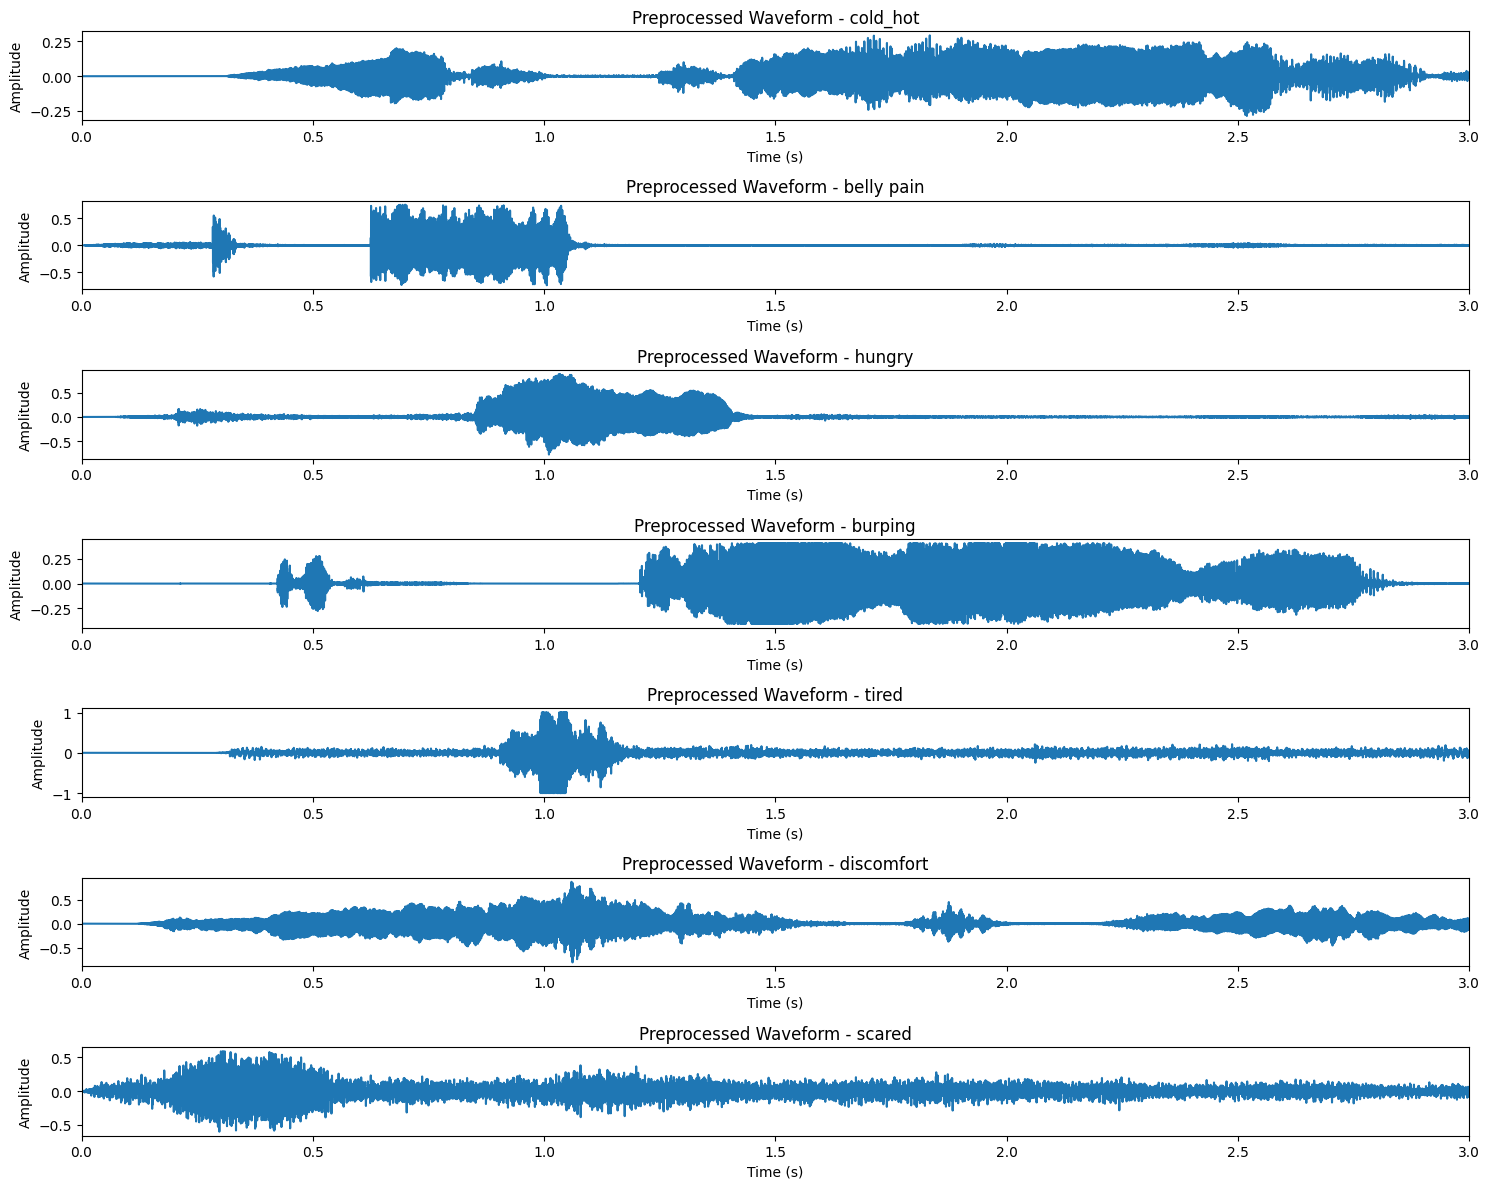

In [19]:
fig, axes = plt.subplots(7, 1, figsize=(15, 12))

for idx, label in enumerate(df['label'].unique()):
    sample_file = df[df['label'] == label].iloc[0]['file_path']

    audio = preprocess_audio(sample_file, sr=SAMPLE_RATE, duration=FIXED_DURATION)

    time = np.linspace(0, FIXED_DURATION, len(audio))
    axes[idx].plot(time, audio)
    axes[idx].set_title(f'Preprocessed Waveform - {label}')
    axes[idx].set_xlabel('Time (s)')
    axes[idx].set_ylabel('Amplitude')
    axes[idx].set_xlim([0, FIXED_DURATION])

plt.tight_layout()
plt.show()

Handle class imbalance - Data Augmentation for Burping

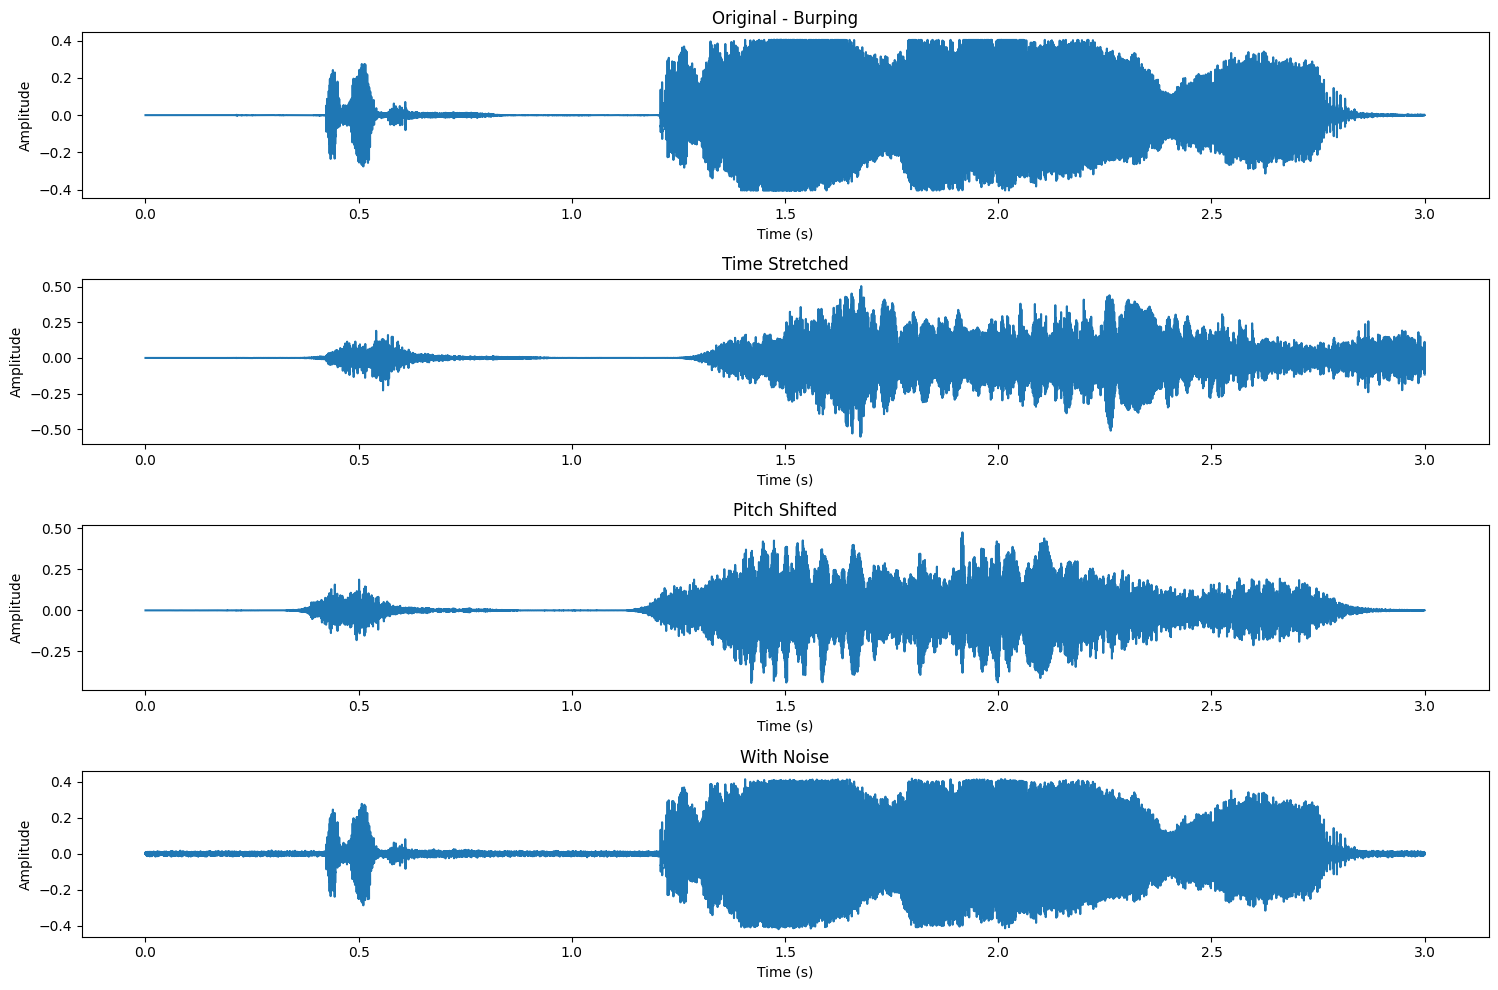

In [20]:
import librosa.effects as effects

def augment_audio(audio, sr=16000, augmentation_type='time_stretch'):
    if augmentation_type == 'time_stretch':
        rate = np.random.uniform(0.9, 1.1) #Makes audio 10% faster or slower
        augmented = librosa.effects.time_stretch(audio, rate=rate)
    elif augmentation_type == 'pitch_shift':
        n_steps = np.random.uniform(-2, 2) #Changes pitch up or down by 2 semitones
        augmented = librosa.effects.pitch_shift(audio, sr=sr, n_steps=n_steps)
    elif augmentation_type == 'noise': #Adds small random background noise
        noise = np.random.randn(len(audio))
        augmented = audio + 0.005 * noise
    else:
        augmented = audio

    if len(augmented) < len(audio):
        padding = len(audio) - len(augmented)
        augmented = np.pad(augmented, (0, padding), mode='constant')
    elif len(augmented) > len(audio):
        augmented = augmented[:len(audio)]

    return augmented

test_audio = preprocess_audio(df[df['label'] == 'burping'].iloc[0]['file_path'])
aug_time = augment_audio(test_audio, augmentation_type='time_stretch')
aug_pitch = augment_audio(test_audio, augmentation_type='pitch_shift')
aug_noise = augment_audio(test_audio, augmentation_type='noise')

fig, axes = plt.subplots(4, 1, figsize=(15, 10))
time = np.linspace(0, FIXED_DURATION, len(test_audio))

axes[0].plot(time, test_audio)
axes[0].set_title('Original - Burping')
axes[1].plot(time, aug_time)
axes[1].set_title('Time Stretched')
axes[2].plot(time, aug_pitch)
axes[2].set_title('Pitch Shifted')
axes[3].plot(time, aug_noise)
axes[3].set_title('With Noise')

for ax in axes:
    ax.set_xlabel('Time (s)')
    ax.set_ylabel('Amplitude')

plt.tight_layout()
plt.show()

# Time stretch: varies crying speed (±10%), Pitch shift: changes tone (±2 semitones), Noise: adds background interference


Create augmented dataset for burping class

In [21]:
burping_files = df[df['label'] == 'burping']['file_path'].tolist()
target_count = 750
current_count = len(burping_files)
needed_augmentations = target_count - current_count

print(f"Current burping samples: {current_count}")
print(f"Target samples: {target_count}")
print(f"Need to create: {needed_augmentations} augmented samples")

augmentation_types = ['time_stretch', 'pitch_shift', 'noise']

augmented_data = []

for i in range(needed_augmentations):
    original_file = burping_files[i % len(burping_files)]

    audio = preprocess_audio(original_file, sr=SAMPLE_RATE, duration=FIXED_DURATION)

    aug_type = augmentation_types[i % len(augmentation_types)]
    augmented = augment_audio(audio, sr=SAMPLE_RATE, augmentation_type=aug_type)

    augmented_data.append({
        'audio': augmented,
        'label': 'burping',
        'original_file': original_file,
        'augmentation': aug_type
    })

print(f"Created {len(augmented_data)} augmented samples")


# Create 503 augmented burping samples to balance with other classes (247→750)
# Cycles through original files, applies time_stretch/pitch_shift/noise augmentations
# Stores augmented audio in memory (not used in current training - using class weights instead)

Current burping samples: 247
Target samples: 750
Need to create: 503 augmented samples
Created 503 augmented samples


Combine Original Dataset with Augmented Burping Samples

In [22]:
from sklearn.preprocessing import LabelEncoder

print("Creating combined dataset with augmented burping samples...")

df_augmented = pd.DataFrame(augmented_data)

df_augmented['file_path'] = df_augmented['original_file']
df_augmented['is_augmented'] = True

label_encoder_temp = LabelEncoder()
label_encoder_temp.fit(df['label'])
df_augmented['label_encoded'] = label_encoder_temp.transform(df_augmented['label'])

df['is_augmented'] = False
df['audio'] = None

df_combined = pd.concat([df, df_augmented], ignore_index=True)

print(f"Original dataset: {len(df)} samples")
print(f"Augmented samples: {len(df_augmented)} samples")
print(f"Combined dataset: {len(df_combined)} samples")
print(f"\nClass distribution after augmentation:")
print(df_combined['label'].value_counts().sort_index())

#This script takes your augmented burping samples, combines them with the original dataset, encodes labels, and prints class distribution after augmentation.

Creating combined dataset with augmented burping samples...
Original dataset: 4749 samples
Augmented samples: 503 samples
Combined dataset: 5252 samples

Class distribution after augmentation:
label
belly pain    750
burping       750
cold_hot      750
discomfort    750
hungry        750
scared        750
tired         752
Name: count, dtype: int64


Update Dataset Class

In [23]:
from torch.utils.data import Dataset
import torch
import numpy as np

class BabyCryDataset(Dataset):
    def __init__(self, dataframe, feature_extractor, sr=16000, duration=3):
        self.dataframe = dataframe.reset_index(drop=True)
        self.feature_extractor = feature_extractor
        self.sr = sr
        self.duration = duration

    def __len__(self):
        return len(self.dataframe)

    def __getitem__(self, idx):
        row = self.dataframe.iloc[idx]

        if row['is_augmented'] and row['audio'] is not None:
            audio = row['audio']
        else:
            audio = preprocess_audio(row['file_path'], sr=self.sr, duration=self.duration)

        if audio is None:
            audio = np.zeros(self.sr * self.duration)

        inputs = self.feature_extractor(
            audio,
            sampling_rate=self.sr,
            return_tensors="pt",
            padding=True
        )

        input_values = inputs.input_values.squeeze(0)
        label = torch.tensor(row['label_encoded'], dtype=torch.long)

        return {
            'input_values': input_values,
            'labels': label
        }

print("Updated BabyCryDataset class created!")




"""
The BabyCryDataset class prepares audio + labels for training a deep learning model (likely a transformer like Hubert, Whisper feature extractor, etc.)
It handles:

Loading/preprocessing audio

Using HuggingFace feature_extractor

Handling augmented audio

Returning ready-to-train tensors

This class will be used inside a PyTorch DataLoader.


"""

Updated BabyCryDataset class created!


'\nThe BabyCryDataset class prepares audio + labels for training a deep learning model (likely a transformer like Hubert, Whisper feature extractor, etc.)\nIt handles:\n\nLoading/preprocessing audio\n\nUsing HuggingFace feature_extractor\n\nHandling augmented audio\n\nReturning ready-to-train tensors\n\nThis class will be used inside a PyTorch DataLoader.\n\n\n'

Encode Labels

In [24]:
from sklearn.preprocessing import LabelEncoder

print("Encoding labels for combined dataset...")

label_encoder = LabelEncoder()
df_combined['label_encoded'] = label_encoder.fit_transform(df_combined['label'])

print("Label Mapping:")
for idx, label in enumerate(label_encoder.classes_):
    print(f"{idx}: {label}")

print(f"\nLabel distribution:")
print(df_combined['label_encoded'].value_counts().sort_index())

import pickle
with open('label_encoder.pkl', 'wb') as f:
    pickle.dump(label_encoder, f)
print("\nLabel encoder saved!")

#This code encodes class labels into numerical values, prints the mapping, checks label distribution,
# and finally saves the LabelEncoder for future use (important for inference).

Encoding labels for combined dataset...
Label Mapping:
0: belly pain
1: burping
2: cold_hot
3: discomfort
4: hungry
5: scared
6: tired

Label distribution:
label_encoded
0    750
1    750
2    750
3    750
4    750
5    750
6    752
Name: count, dtype: int64

Label encoder saved!


In [25]:
import pickle

with open('label_encoder.pkl', 'wb') as f:
    pickle.dump(label_encoder, f)

print("Label encoder saved as 'label_encoder.pkl'")
print(f"Classes: {label_encoder.classes_}")

Label encoder saved as 'label_encoder.pkl'
Classes: ['belly pain' 'burping' 'cold_hot' 'discomfort' 'hungry' 'scared' 'tired']


Split Dataset (Train/Val/Test)

In [26]:
from sklearn.model_selection import train_test_split

train_df, temp_df = train_test_split(
    df_combined,
    test_size=0.3,
    stratify=df_combined['label_encoded'],
    random_state=42
)

val_df, test_df = train_test_split(
    temp_df,
    test_size=0.5,
    stratify=temp_df['label_encoded'], #keeps label distribution similar across splits
    random_state=42
)

train_df = train_df.reset_index(drop=True)
val_df = val_df.reset_index(drop=True)
test_df = test_df.reset_index(drop=True)

print(f"Train: {len(train_df)} samples")
print(f"Val: {len(val_df)} samples")
print(f"Test: {len(test_df)} samples")

print(f"\nTrain distribution:")
print(train_df['label'].value_counts().sort_index())

print(f"\nAugmented samples in train: {train_df['is_augmented'].sum()}")
print(f"Augmented samples in val: {val_df['is_augmented'].sum()}")
print(f"Augmented samples in test: {test_df['is_augmented'].sum()}")

Train: 3676 samples
Val: 788 samples
Test: 788 samples

Train distribution:
label
belly pain    525
burping       525
cold_hot      525
discomfort    525
hungry        525
scared        525
tired         526
Name: count, dtype: int64

Augmented samples in train: 356
Augmented samples in val: 78
Augmented samples in test: 69


Reset indices for clean dataframes

In [27]:
train_df = train_df.reset_index(drop=True)
val_df = val_df.reset_index(drop=True)
test_df = test_df.reset_index(drop=True)

print("Indices reset successfully!")
print(f"Train shape: {train_df.shape}")
print(f"Val shape: {val_df.shape}")
print(f"Test shape: {test_df.shape}")

Indices reset successfully!
Train shape: (3676, 7)
Val shape: (788, 7)
Test shape: (788, 7)


Create Datasets

Install Required Libraries

In [28]:
!pip install -q transformers datasets torch torchaudio accelerate

#transformers: HuggingFace’s library for pretrained transformer models (BERT, HuBERT, Wav2Vec2, GPT, etc.)
#datasets: HuggingFace’s efficient dataset library for loading, processing, and sharing datasets
#torch: PyTorch — a popular deep learning framework
#torchaudio: Audio utilities for PyTorch (loading, transformations, augmentations)
#accelerate: HuggingFace tool to easily handle distributed training and mixed precision

In [29]:
import torch
from transformers import Wav2Vec2FeatureExtractor, HubertModel
from torch.utils.data import Dataset, DataLoader

"""
Wav2Vec2FeatureExtractor:
A HuggingFace class that processes raw audio waveforms into features that transformer models like HuBERT expect.
It handles resampling, normalization, and padding to prepare audio for the model.

"""

'\nWav2Vec2FeatureExtractor:\nA HuggingFace class that processes raw audio waveforms into features that transformer models like HuBERT expect.\nIt handles resampling, normalization, and padding to prepare audio for the model.\n\n'

In [30]:
from transformers import Wav2Vec2FeatureExtractor

model_name = "facebook/hubert-base-ls960"

print(f"Loading HuBERT feature extractor: {model_name}")
feature_extractor = Wav2Vec2FeatureExtractor.from_pretrained(model_name)

print("Feature extractor loaded successfully!")
print(f"Sampling rate: {feature_extractor.sampling_rate}")

Loading HuBERT feature extractor: facebook/hubert-base-ls960


/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


preprocessor_config.json:   0%|          | 0.00/213 [00:00<?, ?B/s]

Feature extractor loaded successfully!
Sampling rate: 16000


Create PyTorch Dataset Class

In [31]:
from torch.utils.data import Dataset
import torch
import numpy as np

class BabyCryDataset(Dataset):
    def __init__(self, dataframe, feature_extractor, sr=16000, duration=3):
        self.dataframe = dataframe.reset_index(drop=True)
        self.feature_extractor = feature_extractor
        self.sr = sr
        self.duration = duration

    def __len__(self):
        return len(self.dataframe)

    def __getitem__(self, idx):
        row = self.dataframe.iloc[idx]

        # Check if augmented and has audio in memory
        if row['is_augmented'] and row['audio'] is not None:
            audio = row['audio']
        else:
            audio = preprocess_audio(row['file_path'], sr=self.sr, duration=self.duration)

        if audio is None:
            audio = np.zeros(self.sr * self.duration)

        inputs = self.feature_extractor(
            audio,
            sampling_rate=self.sr,
            return_tensors="pt",
            padding=True
        )

        input_values = inputs.input_values.squeeze(0)
        label = torch.tensor(row['label_encoded'], dtype=torch.long)

        return {
            'input_values': input_values,
            'labels': label
        }

print("Fixed BabyCryDataset class created!")

#PyTorch Dataset class prepares audio samples and their labels for training a deep learning model, typically using transformer-based audio models like HuBERT or Wav2Vec2.

Fixed BabyCryDataset class created!


Create Full Datasets (Train/Val/Test)

In [32]:
train_dataset = BabyCryDataset(
    dataframe=train_df,
    feature_extractor=feature_extractor,
    sr=SAMPLE_RATE,
    duration=FIXED_DURATION
)

val_dataset = BabyCryDataset(
    dataframe=val_df,
    feature_extractor=feature_extractor,
    sr=SAMPLE_RATE,
    duration=FIXED_DURATION
)

test_dataset = BabyCryDataset(
    dataframe=test_df,
    feature_extractor=feature_extractor,
    sr=SAMPLE_RATE,
    duration=FIXED_DURATION
)

print(f"Datasets recreated!")
print(f"Train: {len(train_dataset)}")
print(f"Val: {len(val_dataset)}")
print(f"Test: {len(test_dataset)}")

Datasets recreated!
Train: 3676
Val: 788
Test: 788


Create DataLoaders

In [33]:
from torch.utils.data import DataLoader

BATCH_SIZE = 8

train_loader = DataLoader(
    train_dataset,
    batch_size=BATCH_SIZE,
    shuffle=True,
    num_workers=2, #Uses 2 CPU cores in parallel to load data faster
    pin_memory=True #Speeds up data transfer from CPU to GPU
)

val_loader = DataLoader(
    val_dataset,
    batch_size=BATCH_SIZE,
    shuffle=False,
    num_workers=2,
    pin_memory=True
)

test_loader = DataLoader(
    test_dataset,
    batch_size=BATCH_SIZE,
    shuffle=False,
    num_workers=2,
    pin_memory=True
)

print(f"DataLoaders recreated!")
print(f"Training batches: {len(train_loader)}")
print(f"Validation batches: {len(val_loader)}")

"""
DataLoader efficiently manages batching, shuffling, and parallel data loading.

This helps keep your GPU busy without waiting for data.

Shuffling training data helps reduce overfitting and improves model robustness.

Validation and test data order stays fixed for reproducible results.
"""

DataLoaders recreated!
Training batches: 460
Validation batches: 99


'\nDataLoader efficiently manages batching, shuffling, and parallel data loading.\n\nThis helps keep your GPU busy without waiting for data.\n\nShuffling training data helps reduce overfitting and improves model robustness.\n\nValidation and test data order stays fixed for reproducible results.\n'

Test DataLoader with One Batch

In [34]:
print("Testing fixed DataLoader...")
batch = next(iter(train_loader))
print(f"Input shape: {batch['input_values'].shape}")
print(f"Labels shape: {batch['labels'].shape}")
print("✅ DataLoader working!")

Testing fixed DataLoader...
Input shape: torch.Size([8, 48000])
Labels shape: torch.Size([8])
✅ DataLoader working!


Load HuBERT Pre-trained Model

In [35]:
from transformers import HubertModel

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f"Using device: {device}")

model_name = "facebook/hubert-base-ls960"

print(f"\nLoading HuBERT model: {model_name}")
print("This may take a few minutes...")

hubert_model = HubertModel.from_pretrained(model_name)

print("HuBERT model loaded successfully!")
print(f"Model size: {sum(p.numel() for p in hubert_model.parameters())/1e6:.2f}M parameters")

Using device: cuda

Loading HuBERT model: facebook/hubert-base-ls960
This may take a few minutes...


config.json: 0.00B [00:00, ?B/s]

pytorch_model.bin:   0%|          | 0.00/378M [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/378M [00:00<?, ?B/s]

HuBERT model loaded successfully!
Model size: 94.37M parameters


Build Classification Model (Fine-tuning Version)

In [36]:
import torch.nn as nn

class BabyCryClassifier(nn.Module):
    def __init__(self, hubert_model, num_classes=7, hidden_dim=256, freeze_hubert=True):
        super(BabyCryClassifier, self).__init__()

        self.hubert = hubert_model
        self.freeze_hubert = freeze_hubert

        if freeze_hubert:
            for param in self.hubert.parameters():
                param.requires_grad = False
            print("HuBERT is FROZEN - only training classifier head")
        else:
            for param in self.hubert.parameters():
                param.requires_grad = True
            print("HuBERT is UNFROZEN - fine-tuning entire model")

        self.classifier = nn.Sequential(
            nn.Linear(768, hidden_dim),
            nn.ReLU(),
            nn.Dropout(0.3),
            nn.Linear(hidden_dim, hidden_dim // 2),
            nn.ReLU(),
            nn.Dropout(0.3),
            nn.Linear(hidden_dim // 2, num_classes)
        )

    def forward(self, input_values):
        outputs = self.hubert(input_values)
        hidden_states = outputs.last_hidden_state
        pooled_output = hidden_states.mean(dim=1)
        logits = self.classifier(pooled_output)
        return logits

    def unfreeze_last_n_layers(self, n=4):
        """Unfreeze last n transformer layers for gradual fine-tuning"""
        for param in self.hubert.encoder.layers[-n:].parameters():
            param.requires_grad = True
        print(f"Unfroze last {n} layers of HuBERT")

# Create model - Start with FROZEN for Phase 1
model = BabyCryClassifier(hubert_model, num_classes=7, freeze_hubert=True)
model = model.to(device)

print("\nBaby Cry Classifier created successfully!")
print(f"Total parameters: {sum(p.numel() for p in model.parameters())/1e6:.2f}M")
print(f"Trainable parameters: {sum(p.numel() for p in model.parameters() if p.requires_grad)/1e6:.2f}M")
print(f"Frozen parameters: {sum(p.numel() for p in model.parameters() if not p.requires_grad)/1e6:.2f}M")

"""
This step is crucial because it combines pretrained audio knowledge with task-specific learning,
balancing training efficiency, preventing overfitting, and enabling effective classification.

Reuse knowledge: Use HuBERT’s learned audio features instead of starting from scratch.

Customize for your problem: Train a small new classifier on top of HuBERT’s features that maps audio to your specific classes (types of baby cries).

Control training: Freeze HuBERT at first to avoid overfitting and reduce computation, then gradually fine-tune it for better accuracy.

"""

HuBERT is FROZEN - only training classifier head

Baby Cry Classifier created successfully!
Total parameters: 94.60M
Trainable parameters: 0.23M
Frozen parameters: 94.37M


'\nThis step is crucial because it combines pretrained audio knowledge with task-specific learning,\nbalancing training efficiency, preventing overfitting, and enabling effective classification.\n\nReuse knowledge: Use HuBERT’s learned audio features instead of starting from scratch.\n\nCustomize for your problem: Train a small new classifier on top of HuBERT’s features that maps audio to your specific classes (types of baby cries).\n\nControl training: Freeze HuBERT at first to avoid overfitting and reduce computation, then gradually fine-tune it for better accuracy.\n\n'

## Test Model Forward Pass

In [37]:
model.eval()

with torch.no_grad():
    test_batch = next(iter(train_loader))
    test_input = test_batch['input_values'].to(device)
    test_labels = test_batch['labels'].to(device)

    print(f"Test input shape: {test_input.shape}")

    outputs = model(test_input)

    print(f"Model output shape: {outputs.shape}")
    print(f"Expected shape: torch.Size([8, 7])")

    predictions = torch.argmax(outputs, dim=1)
    print(f"\nPredictions: {predictions}")
    print(f"True labels: {test_labels}")
    print(f"Predicted classes: {[label_encoder.inverse_transform([p.item()])[0] for p in predictions]}")
    print(f"True classes: {[label_encoder.inverse_transform([l.item()])[0] for l in test_labels]}")

    print("\n✅ Model is ready for training!")

Test input shape: torch.Size([8, 48000])
Model output shape: torch.Size([8, 7])
Expected shape: torch.Size([8, 7])

Predictions: tensor([0, 0, 0, 0, 0, 0, 0, 0], device='cuda:0')
True labels: tensor([5, 5, 5, 4, 1, 2, 0, 2], device='cuda:0')
Predicted classes: ['belly pain', 'belly pain', 'belly pain', 'belly pain', 'belly pain', 'belly pain', 'belly pain', 'belly pain']
True classes: ['scared', 'scared', 'scared', 'hungry', 'burping', 'cold_hot', 'belly pain', 'cold_hot']

✅ Model is ready for training!


Setup Training (Phase 1 - Frozen HuBERT)

In [38]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.optim.lr_scheduler import LambdaLR
from torch.cuda.amp import autocast, GradScaler
from tqdm import tqdm
import time
from collections import Counter

# ============== IMPROVED CLASSIFIER ==============

class ImprovedClassifier(nn.Module):
    """Stronger classifier with multiple layers and normalization"""
    def __init__(self, input_dim=768, hidden_dim=512, num_classes=10, dropout=0.3):
        super().__init__()

        self.classifier = nn.Sequential(
            # First block - Main feature extraction
            nn.Linear(input_dim, hidden_dim),
            nn.LayerNorm(hidden_dim),
            nn.GELU(),
            nn.Dropout(dropout),

            # Second block - Feature refinement
            nn.Linear(hidden_dim, hidden_dim // 2),
            nn.LayerNorm(hidden_dim // 2),
            nn.GELU(),
            nn.Dropout(dropout),

            # Optional third block for complex tasks
            nn.Linear(hidden_dim // 2, hidden_dim // 4),
            nn.LayerNorm(hidden_dim // 4),
            nn.GELU(),
            nn.Dropout(dropout / 2),

            # Output layer
            nn.Linear(hidden_dim // 4, num_classes)
        )

    def forward(self, x):
        return self.classifier(x)

# Replace the simple classifier
print("Replacing classifier with improved architecture...")
YOUR_NUM_CLASSES = len(set([item['labels'].item() for item in train_dataset]))

model.classifier = ImprovedClassifier(
    input_dim=768,
    hidden_dim=512,
    num_classes=YOUR_NUM_CLASSES,
    dropout=0.3
).to(device)

print(f"✓ Improved classifier initialized with {YOUR_NUM_CLASSES} classes")
print(f"✓ Trainable parameters: {sum(p.numel() for p in model.classifier.parameters()):,}")

# ============== DATA DIAGNOSTICS ==============

print("\n" + "="*70)
print("DATA DIAGNOSTICS")
print("="*70)

train_labels = [item['labels'].item() for item in train_dataset]
val_labels = [item['labels'].item() for item in val_dataset]

train_class_counts = Counter(train_labels)
val_class_counts = Counter(val_labels)

print(f"Number of classes: {YOUR_NUM_CLASSES}")
print(f"Training samples: {len(train_labels)}")
print(f"Validation samples: {len(val_labels)}")
print(f"Samples per class (avg): {len(train_labels) / YOUR_NUM_CLASSES:.1f}")

# Check class balance
max_count = max(train_class_counts.values())
min_count = min(train_class_counts.values())
imbalance_ratio = max_count / min_count

print(f"\nClass imbalance ratio: {imbalance_ratio:.2f}x")
if imbalance_ratio > 3:
    print("⚠️  WARNING: Severe class imbalance detected!")
    print("   Recommendation: Use weighted loss function")

print("\nClass distribution (training):")
for cls, count in sorted(train_class_counts.items()):
    percentage = 100 * count / len(train_labels)
    print(f"  Class {cls}: {count:4d} samples ({percentage:5.2f}%)")

# ============== WEIGHTED LOSS (if imbalanced) ==============

if imbalance_ratio > 2:
    print("\n✓ Using weighted CrossEntropyLoss due to class imbalance")
    total = len(train_labels)
    class_weights = torch.tensor([
        total / (YOUR_NUM_CLASSES * train_class_counts[i])
        for i in range(YOUR_NUM_CLASSES)
    ], dtype=torch.float32).to(device)
    criterion = nn.CrossEntropyLoss(weight=class_weights, label_smoothing=0.05)
else:
    print("\n✓ Using standard CrossEntropyLoss (classes are balanced)")
    criterion = nn.CrossEntropyLoss(label_smoothing=0.05)

# ============== OPTIMIZER WITH HIGHER LEARNING RATE ==============

optimizer = optim.AdamW(
    model.classifier.parameters(),
    lr=1e-4,  # Increased from 5e-5 to combat underfitting
    weight_decay=0.01,
    betas=(0.9, 0.999),
    eps=1e-8
)

# ============== SCHEDULER WITH WARMUP ==============

def get_linear_schedule_with_warmup(optimizer, num_warmup_steps, num_training_steps):
    def lr_lambda(current_step):
        if current_step < num_warmup_steps:
            return float(current_step) / float(max(1, num_warmup_steps))
        return max(0.0, float(num_training_steps - current_step) /
                   float(max(1, num_training_steps - num_warmup_steps)))
    return LambdaLR(optimizer, lr_lambda)

num_epochs = 60  # Increased to give more time
num_training_steps = len(train_loader) * num_epochs
num_warmup_steps = num_training_steps // 10

scheduler = get_linear_schedule_with_warmup(optimizer, num_warmup_steps, num_training_steps)
scaler = GradScaler()

# ============== EARLY STOPPING ==============

class EarlyStopping:
    def __init__(self, patience=15, min_delta=0.001):
        self.patience = patience
        self.min_delta = min_delta
        self.counter = 0
        self.best_loss = None
        self.early_stop = False

    def __call__(self, val_loss):
        if self.best_loss is None:
            self.best_loss = val_loss
        elif val_loss > self.best_loss - self.min_delta:
            self.counter += 1
            if self.counter >= self.patience:
                self.early_stop = True
        else:
            self.best_loss = val_loss
            self.counter = 0

early_stopping = EarlyStopping(patience=15)

print("\n" + "="*70)
print("OPTIMIZED TRAINING SETUP (Phase 1 - Anti-Underfitting)")
print("="*70)
print(f"Classifier: 3-layer MLP with LayerNorm + GELU")
print(f"Hidden dimensions: 768 → 512 → 256 → 128 → {YOUR_NUM_CLASSES}")
print(f"Loss function: CrossEntropyLoss (label_smoothing=0.05)")
if imbalance_ratio > 2:
    print(f"Loss weighting: Enabled (imbalance={imbalance_ratio:.2f}x)")
print(f"Optimizer: AdamW")
print(f"Learning rate: 1e-4 (INCREASED to combat underfitting)")
print(f"Warmup steps: {num_warmup_steps}")
print(f"Total steps: {num_training_steps}")
print(f"Epochs: {num_epochs}")
print(f"Gradient clipping: 1.0")
print(f"Mixed precision: Enabled")
print(f"Early stopping: 15 epochs")
print("="*70)

Replacing classifier with improved architecture...
✓ Improved classifier initialized with 7 classes
✓ Trainable parameters: 560,647

DATA DIAGNOSTICS
Number of classes: 7
Training samples: 3676
Validation samples: 788
Samples per class (avg): 525.1

Class imbalance ratio: 1.00x

Class distribution (training):
  Class 0:  525 samples (14.28%)
  Class 1:  525 samples (14.28%)
  Class 2:  525 samples (14.28%)
  Class 3:  525 samples (14.28%)
  Class 4:  525 samples (14.28%)
  Class 5:  525 samples (14.28%)
  Class 6:  526 samples (14.31%)

✓ Using standard CrossEntropyLoss (classes are balanced)

OPTIMIZED TRAINING SETUP (Phase 1 - Anti-Underfitting)
Classifier: 3-layer MLP with LayerNorm + GELU
Hidden dimensions: 768 → 512 → 256 → 128 → 7
Loss function: CrossEntropyLoss (label_smoothing=0.05)
Optimizer: AdamW
Learning rate: 1e-4 (INCREASED to combat underfitting)
Warmup steps: 2760
Total steps: 27600
Epochs: 60
Gradient clipping: 1.0
Mixed precision: Enabled
Early stopping: 15 epochs


/tmp/ipython-input-3853774744.py:128: FutureWarning: `torch.cuda.amp.GradScaler(args...)` is deprecated. Please use `torch.amp.GradScaler('cuda', args...)` instead.
  scaler = GradScaler()


Training Loop (Phase 1 - Frozen HuBERT)

In [39]:
# ============== TRAINING FUNCTIONS ==============

def train_epoch(model, dataloader, criterion, optimizer, scheduler, scaler, device):
    model.train()
    running_loss = 0.0
    correct = 0
    total = 0

    progress_bar = tqdm(dataloader, desc="Training")

    for batch in progress_bar:
        inputs = batch['input_values'].to(device)
        labels = batch['labels'].to(device)

        optimizer.zero_grad()

        with autocast():
            outputs = model(inputs)
            loss = criterion(outputs, labels)

        scaler.scale(loss).backward()
        scaler.unscale_(optimizer)
        torch.nn.utils.clip_grad_norm_(model.classifier.parameters(), max_norm=1.0)
        scaler.step(optimizer)
        scaler.update()
        scheduler.step()

        running_loss += loss.item()
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

        current_lr = scheduler.get_last_lr()[0]
        progress_bar.set_postfix({
            'loss': f'{loss.item():.4f}',
            'acc': f'{100 * correct / total:.2f}%',
            'lr': f'{current_lr:.2e}'
        })

    return running_loss / len(dataloader), 100 * correct / total

def validate_epoch(model, dataloader, criterion, device):
    model.eval()
    running_loss = 0.0
    correct = 0
    total = 0

    with torch.no_grad():
        for batch in tqdm(dataloader, desc="Validation"):
            inputs = batch['input_values'].to(device)
            labels = batch['labels'].to(device)

            with autocast():
                outputs = model(inputs)
                loss = criterion(outputs, labels)

            running_loss += loss.item()
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    return running_loss / len(dataloader), 100 * correct / total

print("Training functions defined successfully!")

#1#########
# Runs one full training epoch: processes all batches, computes loss, and updates model weights.
# Uses mixed precision for faster training and gradient clipping to prevent exploding gradients.
# Tracks and displays running loss, accuracy, and learning rate in a progress bar.

#2########
# Runs one full validation epoch: evaluates model performance without updating weights.
# Uses mixed precision and no_grad for efficient inference.
# Tracks and returns average loss and accuracy over the validation set.



Training functions defined successfully!


Start Training!


STARTING OPTIMIZED PHASE 1 TRAINING

Epoch 1/60
----------------------------------------------------------------------


Training:   0%|          | 0/460 [00:00<?, ?it/s]/tmp/ipython-input-510334923.py:17: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with autocast():
Validation:   0%|          | 0/99 [00:00<?, ?it/s]/tmp/ipython-input-510334923.py:53: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with autocast():
Validation: 100%|██████████| 99/99 [00:04<00:00, 20.62it/s]



Epoch 1 Summary:
Train Loss: 1.9948 | Train Acc: 14.80%
Val Loss: 1.9270 | Val Acc: 17.39%
Improvement: +17.39%
Learning Rate: 1.67e-05
Time: 67.77s
✅ Best model saved! Val Acc: 17.39%
----------------------------------------------------------------------

Epoch 2/60
----------------------------------------------------------------------


Validation: 100%|██████████| 99/99 [00:04<00:00, 23.57it/s]



Epoch 2 Summary:
Train Loss: 1.9358 | Train Acc: 18.31%
Val Loss: 1.8570 | Val Acc: 25.51%
Improvement: +8.12%
Learning Rate: 3.33e-05
Time: 50.46s
✅ Best model saved! Val Acc: 25.51%
----------------------------------------------------------------------

Epoch 3/60
----------------------------------------------------------------------


Validation: 100%|██████████| 99/99 [00:04<00:00, 23.36it/s]



Epoch 3 Summary:
Train Loss: 1.8614 | Train Acc: 24.21%
Val Loss: 1.7935 | Val Acc: 28.81%
Improvement: +3.30%
Learning Rate: 5.00e-05
Time: 49.50s
✅ Best model saved! Val Acc: 28.81%
----------------------------------------------------------------------

Epoch 4/60
----------------------------------------------------------------------


Validation: 100%|██████████| 99/99 [00:04<00:00, 23.61it/s]



Epoch 4 Summary:
Train Loss: 1.7743 | Train Acc: 29.13%
Val Loss: 1.7276 | Val Acc: 29.95%
Improvement: +1.14%
Learning Rate: 6.67e-05
Time: 47.66s
✅ Best model saved! Val Acc: 29.95%
----------------------------------------------------------------------

Epoch 5/60
----------------------------------------------------------------------


Validation: 100%|██████████| 99/99 [00:04<00:00, 23.14it/s]



Epoch 5 Summary:
Train Loss: 1.7200 | Train Acc: 32.07%
Val Loss: 1.6249 | Val Acc: 38.07%
Improvement: +8.12%
Learning Rate: 8.33e-05
Time: 53.63s
✅ Best model saved! Val Acc: 38.07%
----------------------------------------------------------------------

Epoch 6/60
----------------------------------------------------------------------


Validation: 100%|██████████| 99/99 [00:04<00:00, 23.29it/s]



Epoch 6 Summary:
Train Loss: 1.6487 | Train Acc: 35.45%
Val Loss: 1.6223 | Val Acc: 38.71%
Improvement: +0.63%
Learning Rate: 1.00e-04
Time: 46.02s
✅ Best model saved! Val Acc: 38.71%
----------------------------------------------------------------------

Epoch 7/60
----------------------------------------------------------------------


Validation: 100%|██████████| 99/99 [00:04<00:00, 23.53it/s]



Epoch 7 Summary:
Train Loss: 1.6101 | Train Acc: 37.76%
Val Loss: 1.5861 | Val Acc: 41.75%
Improvement: +3.05%
Learning Rate: 9.81e-05
Time: 45.96s
✅ Best model saved! Val Acc: 41.75%
----------------------------------------------------------------------

Epoch 8/60
----------------------------------------------------------------------


Validation: 100%|██████████| 99/99 [00:04<00:00, 23.55it/s]



Epoch 8 Summary:
Train Loss: 1.5553 | Train Acc: 40.34%
Val Loss: 1.5921 | Val Acc: 41.24%
Improvement: -0.51%
Learning Rate: 9.63e-05
Time: 46.09s
----------------------------------------------------------------------

Epoch 9/60
----------------------------------------------------------------------


Validation: 100%|██████████| 99/99 [00:04<00:00, 23.25it/s]



Epoch 9 Summary:
Train Loss: 1.5254 | Train Acc: 42.74%
Val Loss: 1.5007 | Val Acc: 44.92%
Improvement: +3.17%
Learning Rate: 9.44e-05
Time: 45.91s
✅ Best model saved! Val Acc: 44.92%
----------------------------------------------------------------------

Epoch 10/60
----------------------------------------------------------------------


Validation: 100%|██████████| 99/99 [00:04<00:00, 23.11it/s]



Epoch 10 Summary:
Train Loss: 1.4643 | Train Acc: 44.75%
Val Loss: 1.5282 | Val Acc: 41.12%
Improvement: -3.81%
Learning Rate: 9.26e-05
Time: 45.94s
----------------------------------------------------------------------

Epoch 11/60
----------------------------------------------------------------------


Validation: 100%|██████████| 99/99 [00:04<00:00, 23.20it/s]



Epoch 11 Summary:
Train Loss: 1.4650 | Train Acc: 44.18%
Val Loss: 1.4817 | Val Acc: 46.95%
Improvement: +2.03%
Learning Rate: 9.07e-05
Time: 46.03s
✅ Best model saved! Val Acc: 46.95%
----------------------------------------------------------------------

Epoch 12/60
----------------------------------------------------------------------


Validation: 100%|██████████| 99/99 [00:04<00:00, 23.23it/s]



Epoch 12 Summary:
Train Loss: 1.4400 | Train Acc: 45.57%
Val Loss: 1.4431 | Val Acc: 46.57%
Improvement: -0.38%
Learning Rate: 8.89e-05
Time: 50.37s
----------------------------------------------------------------------

Epoch 13/60
----------------------------------------------------------------------


Validation: 100%|██████████| 99/99 [00:04<00:00, 23.51it/s]



Epoch 13 Summary:
Train Loss: 1.3924 | Train Acc: 48.04%
Val Loss: 1.4423 | Val Acc: 46.83%
Improvement: -0.13%
Learning Rate: 8.70e-05
Time: 45.88s
----------------------------------------------------------------------

Epoch 14/60
----------------------------------------------------------------------


Validation: 100%|██████████| 99/99 [00:04<00:00, 23.44it/s]



Epoch 14 Summary:
Train Loss: 1.3690 | Train Acc: 49.21%
Val Loss: 1.4564 | Val Acc: 46.32%
Improvement: -0.63%
Learning Rate: 8.52e-05
Time: 46.03s
----------------------------------------------------------------------

Epoch 15/60
----------------------------------------------------------------------


Validation: 100%|██████████| 99/99 [00:04<00:00, 23.02it/s]



Epoch 15 Summary:
Train Loss: 1.3619 | Train Acc: 48.94%
Val Loss: 1.4155 | Val Acc: 47.72%
Improvement: +0.76%
Learning Rate: 8.33e-05
Time: 46.11s
✅ Best model saved! Val Acc: 47.72%
----------------------------------------------------------------------

Epoch 16/60
----------------------------------------------------------------------


Validation: 100%|██████████| 99/99 [00:04<00:00, 23.09it/s]



Epoch 16 Summary:
Train Loss: 1.3336 | Train Acc: 50.92%
Val Loss: 1.4218 | Val Acc: 47.72%
Improvement: +0.00%
Learning Rate: 8.15e-05
Time: 46.02s
----------------------------------------------------------------------

Epoch 17/60
----------------------------------------------------------------------


Validation: 100%|██████████| 99/99 [00:04<00:00, 23.17it/s]



Epoch 17 Summary:
Train Loss: 1.3177 | Train Acc: 51.22%
Val Loss: 1.4152 | Val Acc: 48.35%
Improvement: +0.63%
Learning Rate: 7.96e-05
Time: 45.91s
✅ Best model saved! Val Acc: 48.35%
----------------------------------------------------------------------

Epoch 18/60
----------------------------------------------------------------------


Validation: 100%|██████████| 99/99 [00:04<00:00, 23.70it/s]



Epoch 18 Summary:
Train Loss: 1.3072 | Train Acc: 51.85%
Val Loss: 1.3967 | Val Acc: 50.00%
Improvement: +1.65%
Learning Rate: 7.78e-05
Time: 45.76s
✅ Best model saved! Val Acc: 50.00%
----------------------------------------------------------------------

Epoch 19/60
----------------------------------------------------------------------


Validation: 100%|██████████| 99/99 [00:04<00:00, 23.56it/s]



Epoch 19 Summary:
Train Loss: 1.2701 | Train Acc: 54.27%
Val Loss: 1.3460 | Val Acc: 50.89%
Improvement: +0.89%
Learning Rate: 7.59e-05
Time: 46.03s
✅ Best model saved! Val Acc: 50.89%
----------------------------------------------------------------------

Epoch 20/60
----------------------------------------------------------------------


Validation: 100%|██████████| 99/99 [00:04<00:00, 23.59it/s]



Epoch 20 Summary:
Train Loss: 1.2623 | Train Acc: 54.41%
Val Loss: 1.3379 | Val Acc: 50.89%
Improvement: +0.00%
Learning Rate: 7.41e-05
Time: 46.38s
----------------------------------------------------------------------

Epoch 21/60
----------------------------------------------------------------------


Validation: 100%|██████████| 99/99 [00:04<00:00, 23.08it/s]



Epoch 21 Summary:
Train Loss: 1.2467 | Train Acc: 56.37%
Val Loss: 1.3051 | Val Acc: 53.30%
Improvement: +2.41%
Learning Rate: 7.22e-05
Time: 46.16s
✅ Best model saved! Val Acc: 53.30%
----------------------------------------------------------------------

Epoch 22/60
----------------------------------------------------------------------


Validation: 100%|██████████| 99/99 [00:04<00:00, 23.19it/s]



Epoch 22 Summary:
Train Loss: 1.2287 | Train Acc: 56.31%
Val Loss: 1.3430 | Val Acc: 51.27%
Improvement: -2.03%
Learning Rate: 7.04e-05
Time: 46.22s
----------------------------------------------------------------------

Epoch 23/60
----------------------------------------------------------------------


Validation: 100%|██████████| 99/99 [00:04<00:00, 23.08it/s]



Epoch 23 Summary:
Train Loss: 1.2159 | Train Acc: 56.64%
Val Loss: 1.3648 | Val Acc: 51.52%
Improvement: -1.78%
Learning Rate: 6.85e-05
Time: 46.53s
----------------------------------------------------------------------

Epoch 24/60
----------------------------------------------------------------------


Validation: 100%|██████████| 99/99 [00:04<00:00, 23.57it/s]



Epoch 24 Summary:
Train Loss: 1.2042 | Train Acc: 57.56%
Val Loss: 1.3278 | Val Acc: 51.65%
Improvement: -1.65%
Learning Rate: 6.67e-05
Time: 47.53s
----------------------------------------------------------------------

Epoch 25/60
----------------------------------------------------------------------


Validation: 100%|██████████| 99/99 [00:04<00:00, 23.51it/s]



Epoch 25 Summary:
Train Loss: 1.1940 | Train Acc: 57.83%
Val Loss: 1.3298 | Val Acc: 52.28%
Improvement: -1.02%
Learning Rate: 6.48e-05
Time: 46.43s
----------------------------------------------------------------------

Epoch 26/60
----------------------------------------------------------------------


Validation: 100%|██████████| 99/99 [00:04<00:00, 23.15it/s]



Epoch 26 Summary:
Train Loss: 1.1586 | Train Acc: 59.19%
Val Loss: 1.3210 | Val Acc: 52.54%
Improvement: -0.76%
Learning Rate: 6.30e-05
Time: 46.40s
----------------------------------------------------------------------

Epoch 27/60
----------------------------------------------------------------------


Validation: 100%|██████████| 99/99 [00:04<00:00, 23.31it/s]



Epoch 27 Summary:
Train Loss: 1.1547 | Train Acc: 59.28%
Val Loss: 1.3072 | Val Acc: 52.41%
Improvement: -0.89%
Learning Rate: 6.11e-05
Time: 46.18s
----------------------------------------------------------------------

Epoch 28/60
----------------------------------------------------------------------


Validation: 100%|██████████| 99/99 [00:04<00:00, 23.65it/s]



Epoch 28 Summary:
Train Loss: 1.1548 | Train Acc: 59.68%
Val Loss: 1.3231 | Val Acc: 52.54%
Improvement: -0.76%
Learning Rate: 5.93e-05
Time: 45.95s
----------------------------------------------------------------------

Epoch 29/60
----------------------------------------------------------------------


Validation: 100%|██████████| 99/99 [00:04<00:00, 23.52it/s]



Epoch 29 Summary:
Train Loss: 1.1301 | Train Acc: 60.99%
Val Loss: 1.3081 | Val Acc: 52.92%
Improvement: -0.38%
Learning Rate: 5.74e-05
Time: 46.20s
----------------------------------------------------------------------

Epoch 30/60
----------------------------------------------------------------------


Validation: 100%|██████████| 99/99 [00:04<00:00, 23.30it/s]



Epoch 30 Summary:
Train Loss: 1.1282 | Train Acc: 61.51%
Val Loss: 1.3031 | Val Acc: 54.44%
Improvement: +1.14%
Learning Rate: 5.56e-05
Time: 46.21s
✅ Best model saved! Val Acc: 54.44%
----------------------------------------------------------------------

Epoch 31/60
----------------------------------------------------------------------


Validation: 100%|██████████| 99/99 [00:04<00:00, 23.54it/s]



Epoch 31 Summary:
Train Loss: 1.1176 | Train Acc: 61.45%
Val Loss: 1.2889 | Val Acc: 53.81%
Improvement: -0.63%
Learning Rate: 5.37e-05
Time: 46.10s
----------------------------------------------------------------------

Epoch 32/60
----------------------------------------------------------------------


Validation: 100%|██████████| 99/99 [00:04<00:00, 23.52it/s]



Epoch 32 Summary:
Train Loss: 1.1077 | Train Acc: 62.40%
Val Loss: 1.2991 | Val Acc: 54.57%
Improvement: +0.13%
Learning Rate: 5.19e-05
Time: 45.92s
✅ Best model saved! Val Acc: 54.57%
----------------------------------------------------------------------

Epoch 33/60
----------------------------------------------------------------------


Validation: 100%|██████████| 99/99 [00:04<00:00, 23.03it/s]



Epoch 33 Summary:
Train Loss: 1.1063 | Train Acc: 61.67%
Val Loss: 1.2720 | Val Acc: 57.23%
Improvement: +2.66%
Learning Rate: 5.00e-05
Time: 46.49s
✅ Best model saved! Val Acc: 57.23%
----------------------------------------------------------------------

Epoch 34/60
----------------------------------------------------------------------


Validation: 100%|██████████| 99/99 [00:04<00:00, 23.27it/s]



Epoch 34 Summary:
Train Loss: 1.1020 | Train Acc: 61.92%
Val Loss: 1.2574 | Val Acc: 55.20%
Improvement: -2.03%
Learning Rate: 4.81e-05
Time: 45.98s
----------------------------------------------------------------------

Epoch 35/60
----------------------------------------------------------------------


Validation: 100%|██████████| 99/99 [00:04<00:00, 23.45it/s]



Epoch 35 Summary:
Train Loss: 1.0727 | Train Acc: 63.76%
Val Loss: 1.2759 | Val Acc: 54.70%
Improvement: -2.54%
Learning Rate: 4.63e-05
Time: 46.01s
----------------------------------------------------------------------

Epoch 36/60
----------------------------------------------------------------------


Validation: 100%|██████████| 99/99 [00:04<00:00, 23.37it/s]



Epoch 36 Summary:
Train Loss: 1.0748 | Train Acc: 63.08%
Val Loss: 1.2820 | Val Acc: 53.43%
Improvement: -3.81%
Learning Rate: 4.44e-05
Time: 46.14s
----------------------------------------------------------------------

Epoch 37/60
----------------------------------------------------------------------


Validation: 100%|██████████| 99/99 [00:04<00:00, 23.04it/s]



Epoch 37 Summary:
Train Loss: 1.0477 | Train Acc: 64.47%
Val Loss: 1.3072 | Val Acc: 53.81%
Improvement: -3.43%
Learning Rate: 4.26e-05
Time: 46.18s
----------------------------------------------------------------------

Epoch 38/60
----------------------------------------------------------------------


Validation: 100%|██████████| 99/99 [00:04<00:00, 23.28it/s]



Epoch 38 Summary:
Train Loss: 1.0645 | Train Acc: 63.63%
Val Loss: 1.2931 | Val Acc: 53.05%
Improvement: -4.19%
Learning Rate: 4.07e-05
Time: 45.97s
----------------------------------------------------------------------

Epoch 39/60
----------------------------------------------------------------------


Validation: 100%|██████████| 99/99 [00:04<00:00, 23.53it/s]



Epoch 39 Summary:
Train Loss: 1.0600 | Train Acc: 63.87%
Val Loss: 1.2324 | Val Acc: 56.60%
Improvement: -0.63%
Learning Rate: 3.89e-05
Time: 45.93s
----------------------------------------------------------------------

Epoch 40/60
----------------------------------------------------------------------


Validation: 100%|██████████| 99/99 [00:04<00:00, 23.60it/s]



Epoch 40 Summary:
Train Loss: 1.0303 | Train Acc: 64.39%
Val Loss: 1.2509 | Val Acc: 54.31%
Improvement: -2.92%
Learning Rate: 3.70e-05
Time: 46.04s
----------------------------------------------------------------------

Epoch 41/60
----------------------------------------------------------------------


Validation: 100%|██████████| 99/99 [00:04<00:00, 22.85it/s]



Epoch 41 Summary:
Train Loss: 1.0389 | Train Acc: 65.34%
Val Loss: 1.2768 | Val Acc: 55.20%
Improvement: -2.03%
Learning Rate: 3.52e-05
Time: 46.22s
----------------------------------------------------------------------

Epoch 42/60
----------------------------------------------------------------------


Validation: 100%|██████████| 99/99 [00:04<00:00, 23.07it/s]



Epoch 42 Summary:
Train Loss: 1.0151 | Train Acc: 64.99%
Val Loss: 1.2535 | Val Acc: 56.60%
Improvement: -0.63%
Learning Rate: 3.33e-05
Time: 46.01s
----------------------------------------------------------------------

Epoch 43/60
----------------------------------------------------------------------


Validation: 100%|██████████| 99/99 [00:04<00:00, 23.56it/s]



Epoch 43 Summary:
Train Loss: 0.9925 | Train Acc: 66.76%
Val Loss: 1.2511 | Val Acc: 57.61%
Improvement: +0.38%
Learning Rate: 3.15e-05
Time: 46.05s
✅ Best model saved! Val Acc: 57.61%
----------------------------------------------------------------------

Epoch 44/60
----------------------------------------------------------------------


Validation: 100%|██████████| 99/99 [00:04<00:00, 23.30it/s]



Epoch 44 Summary:
Train Loss: 1.0324 | Train Acc: 65.48%
Val Loss: 1.2398 | Val Acc: 56.35%
Improvement: -1.27%
Learning Rate: 2.96e-05
Time: 46.40s
----------------------------------------------------------------------

Epoch 45/60
----------------------------------------------------------------------


Validation: 100%|██████████| 99/99 [00:04<00:00, 23.32it/s]



Epoch 45 Summary:
Train Loss: 1.0159 | Train Acc: 66.40%
Val Loss: 1.2381 | Val Acc: 56.47%
Improvement: -1.14%
Learning Rate: 2.78e-05
Time: 45.67s
----------------------------------------------------------------------

Epoch 46/60
----------------------------------------------------------------------


Validation: 100%|██████████| 99/99 [00:04<00:00, 23.16it/s]



Epoch 46 Summary:
Train Loss: 0.9854 | Train Acc: 66.68%
Val Loss: 1.2534 | Val Acc: 57.36%
Improvement: -0.25%
Learning Rate: 2.59e-05
Time: 46.32s
----------------------------------------------------------------------

Epoch 47/60
----------------------------------------------------------------------


Validation: 100%|██████████| 99/99 [00:04<00:00, 23.61it/s]



Epoch 47 Summary:
Train Loss: 0.9865 | Train Acc: 67.30%
Val Loss: 1.2515 | Val Acc: 58.63%
Improvement: +1.02%
Learning Rate: 2.41e-05
Time: 46.12s
✅ Best model saved! Val Acc: 58.63%
----------------------------------------------------------------------

Epoch 48/60
----------------------------------------------------------------------


Validation: 100%|██████████| 99/99 [00:04<00:00, 23.43it/s]



Epoch 48 Summary:
Train Loss: 0.9891 | Train Acc: 68.01%
Val Loss: 1.2575 | Val Acc: 57.11%
Improvement: -1.52%
Learning Rate: 2.22e-05
Time: 46.20s
----------------------------------------------------------------------

Epoch 49/60
----------------------------------------------------------------------


Validation: 100%|██████████| 99/99 [00:04<00:00, 23.20it/s]



Epoch 49 Summary:
Train Loss: 0.9605 | Train Acc: 68.93%
Val Loss: 1.2480 | Val Acc: 56.73%
Improvement: -1.90%
Learning Rate: 2.04e-05
Time: 46.35s
----------------------------------------------------------------------

Epoch 50/60
----------------------------------------------------------------------


Validation: 100%|██████████| 99/99 [00:04<00:00, 23.18it/s]



Epoch 50 Summary:
Train Loss: 0.9582 | Train Acc: 68.77%
Val Loss: 1.2518 | Val Acc: 56.47%
Improvement: -2.16%
Learning Rate: 1.85e-05
Time: 46.15s
----------------------------------------------------------------------

Epoch 51/60
----------------------------------------------------------------------


Validation: 100%|██████████| 99/99 [00:04<00:00, 23.32it/s]



Epoch 51 Summary:
Train Loss: 0.9555 | Train Acc: 68.69%
Val Loss: 1.2780 | Val Acc: 55.96%
Improvement: -2.66%
Learning Rate: 1.67e-05
Time: 46.21s
----------------------------------------------------------------------

Epoch 52/60
----------------------------------------------------------------------


Validation: 100%|██████████| 99/99 [00:04<00:00, 23.51it/s]



Epoch 52 Summary:
Train Loss: 0.9580 | Train Acc: 68.23%
Val Loss: 1.2521 | Val Acc: 56.85%
Improvement: -1.78%
Learning Rate: 1.48e-05
Time: 46.24s
----------------------------------------------------------------------

Epoch 53/60
----------------------------------------------------------------------


Validation: 100%|██████████| 99/99 [00:04<00:00, 23.52it/s]



Epoch 53 Summary:
Train Loss: 0.9633 | Train Acc: 67.90%
Val Loss: 1.2545 | Val Acc: 56.98%
Improvement: -1.65%
Learning Rate: 1.30e-05
Time: 46.16s
----------------------------------------------------------------------

Epoch 54/60
----------------------------------------------------------------------


Validation: 100%|██████████| 99/99 [00:04<00:00, 22.89it/s]



Epoch 54 Summary:
Train Loss: 0.9633 | Train Acc: 68.93%
Val Loss: 1.2454 | Val Acc: 56.73%
Improvement: -1.90%
Learning Rate: 1.11e-05
Time: 46.32s

⚠️  Early stopping at epoch 54

PHASE 1 TRAINING COMPLETED!
Best Validation Accuracy: 58.63%
Best Validation Loss: 1.2515
Improvement over previous: 15.23%
Total Epochs: 54


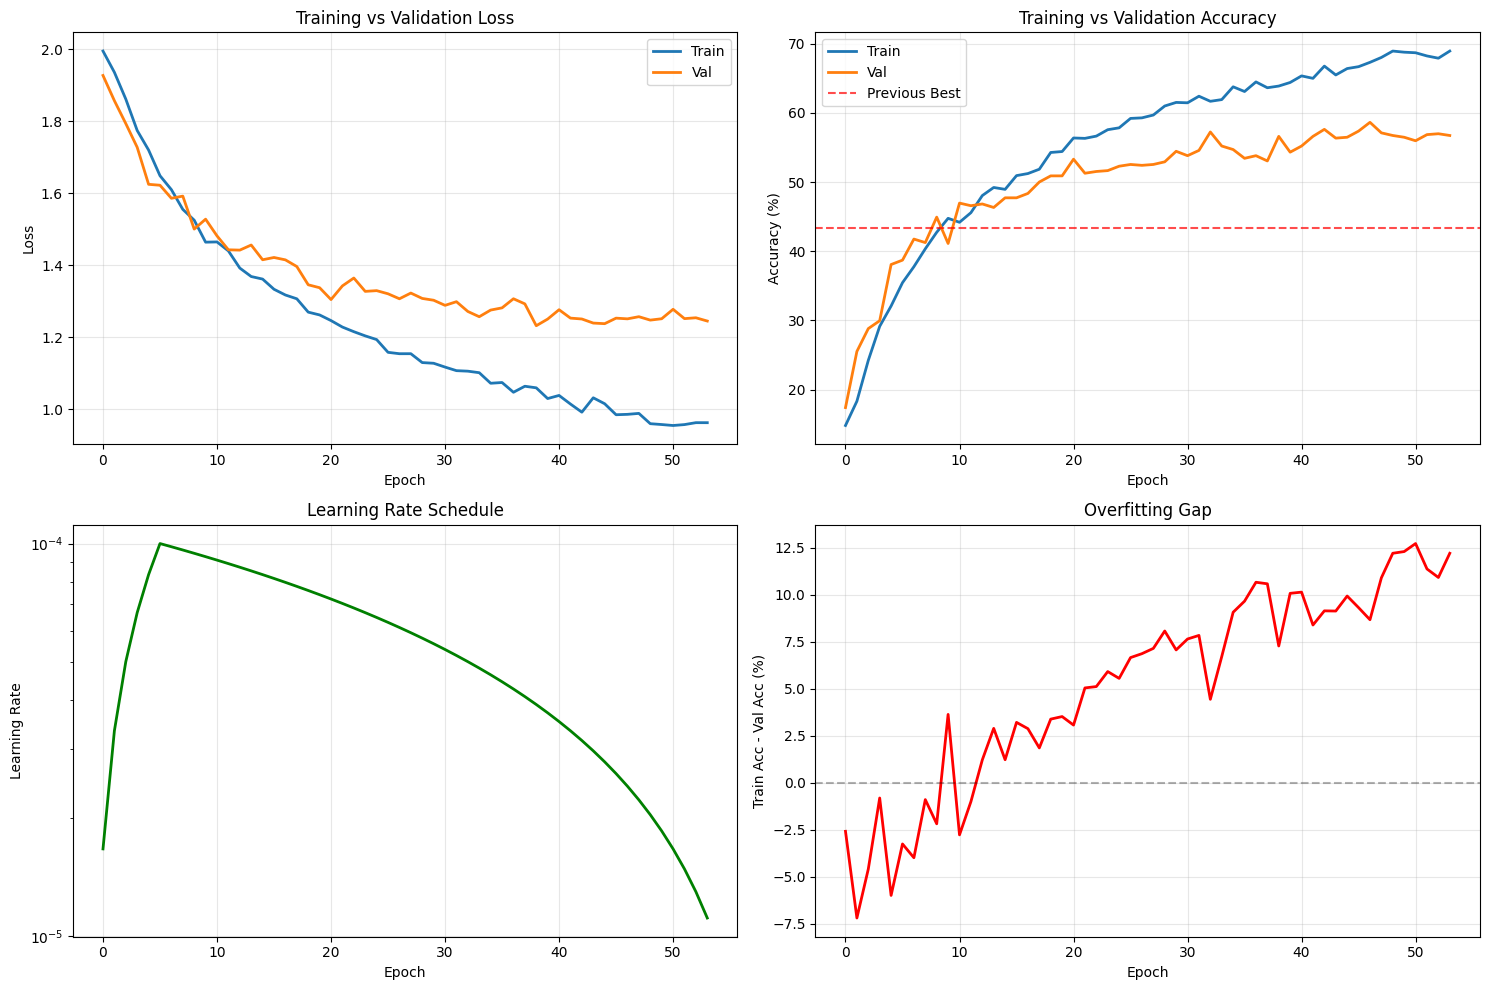


📊 Training curves saved!


In [40]:
# ============== TRAINING LOOP ==============

best_val_loss = float('inf')
best_val_acc = 0.0
train_losses = []
train_accs = []
val_losses = []
val_accs = []
learning_rates = []

print("\n" + "="*70)
print("STARTING OPTIMIZED PHASE 1 TRAINING")
print("="*70)

for epoch in range(num_epochs):
    start_time = time.time()

    print(f"\nEpoch {epoch+1}/{num_epochs}")
    print("-" * 70)

    train_loss, train_acc = train_epoch(
        model, train_loader, criterion, optimizer, scheduler, scaler, device
    )
    val_loss, val_acc = validate_epoch(model, val_loader, criterion, device)

    train_losses.append(train_loss)
    train_accs.append(train_acc)
    val_losses.append(val_loss)
    val_accs.append(val_acc)
    learning_rates.append(scheduler.get_last_lr()[0])

    epoch_time = time.time() - start_time

    print(f"\nEpoch {epoch+1} Summary:")
    print(f"Train Loss: {train_loss:.4f} | Train Acc: {train_acc:.2f}%")
    print(f"Val Loss: {val_loss:.4f} | Val Acc: {val_acc:.2f}%")
    print(f"Improvement: {val_acc - best_val_acc:+.2f}%")
    print(f"Learning Rate: {learning_rates[-1]:.2e}")
    print(f"Time: {epoch_time:.2f}s")

    if val_acc > best_val_acc:
        best_val_acc = val_acc
        best_val_loss = val_loss

        checkpoint = {
            'epoch': epoch + 1,
            'model_state_dict': model.state_dict(),
            'optimizer_state_dict': optimizer.state_dict(),
            'scheduler_state_dict': scheduler.state_dict(),
            'val_acc': val_acc,
            'val_loss': val_loss,
            'num_classes': YOUR_NUM_CLASSES,
            'train_losses': train_losses,
            'val_losses': val_losses,
        }
        torch.save(checkpoint, 'best_model_phase1_improved.pth')
        print(f"✅ Best model saved! Val Acc: {val_acc:.2f}%")

    early_stopping(val_loss)
    if early_stopping.early_stop:
        print(f"\n⚠️  Early stopping at epoch {epoch+1}")
        break

    print("-" * 70)

print("\n" + "="*70)
print("PHASE 1 TRAINING COMPLETED!")
print("="*70)
print(f"Best Validation Accuracy: {best_val_acc:.2f}%")
print(f"Best Validation Loss: {best_val_loss:.4f}")
print(f"Improvement over previous: {best_val_acc - 43.4:.2f}%")
print(f"Total Epochs: {len(train_losses)}")
print("="*70)

# ============== VISUALIZE RESULTS ==============

import matplotlib.pyplot as plt
import numpy as np

fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# Loss
axes[0, 0].plot(train_losses, label='Train', linewidth=2)
axes[0, 0].plot(val_losses, label='Val', linewidth=2)
axes[0, 0].set_xlabel('Epoch')
axes[0, 0].set_ylabel('Loss')
axes[0, 0].set_title('Training vs Validation Loss')
axes[0, 0].legend()
axes[0, 0].grid(True, alpha=0.3)

# Accuracy
axes[0, 1].plot(train_accs, label='Train', linewidth=2)
axes[0, 1].plot(val_accs, label='Val', linewidth=2)
axes[0, 1].axhline(y=43.4, color='red', linestyle='--', label='Previous Best', alpha=0.7)
axes[0, 1].set_xlabel('Epoch')
axes[0, 1].set_ylabel('Accuracy (%)')
axes[0, 1].set_title('Training vs Validation Accuracy')
axes[0, 1].legend()
axes[0, 1].grid(True, alpha=0.3)

# Learning Rate
axes[1, 0].plot(learning_rates, linewidth=2, color='green')
axes[1, 0].set_xlabel('Epoch')
axes[1, 0].set_ylabel('Learning Rate')
axes[1, 0].set_title('Learning Rate Schedule')
axes[1, 0].set_yscale('log')
axes[1, 0].grid(True, alpha=0.3)

# Overfitting Gap
gap = np.array(train_accs) - np.array(val_accs)
axes[1, 1].plot(gap, linewidth=2, color='red')
axes[1, 1].axhline(y=0, color='black', linestyle='--', alpha=0.3)
axes[1, 1].set_xlabel('Epoch')
axes[1, 1].set_ylabel('Train Acc - Val Acc (%)')
axes[1, 1].set_title('Overfitting Gap')
axes[1, 1].grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('training_curves_phase1_improved.png', dpi=300)
plt.show()

print("\n📊 Training curves saved!")

Phase 2 Setup - MODEL SETUP & UNFREEZING









DIAGNOSTIC: What happens if we remove hungry?

In [41]:
# ============================================================
# DIAGNOSTIC: What happens if we remove hungry?
# ============================================================

print("="*80)
print("DIAGNOSTIC: Analyzing impact of removing 'hungry' class")
print("="*80)

# Filter out hungry class (label index 4)
train_df_no_hungry = train_df[train_df['label_encoded'] != 4].reset_index(drop=True)
val_df_no_hungry = val_df[val_df['label_encoded'] != 4].reset_index(drop=True)
test_df_no_hungry = test_df[test_df['label_encoded'] != 4].reset_index(drop=True)

# Re-encode labels (0-5 instead of 0-6, skipping 4)
from sklearn.preprocessing import LabelEncoder

label_encoder_no_hungry = LabelEncoder()
train_df_no_hungry['label_encoded'] = label_encoder_no_hungry.fit_transform(train_df_no_hungry['label'])
val_df_no_hungry['label_encoded'] = label_encoder_no_hungry.transform(val_df_no_hungry['label'])
test_df_no_hungry['label_encoded'] = label_encoder_no_hungry.transform(test_df_no_hungry['label'])

print(f"\nDataset sizes:")
print(f"  Original train: {len(train_df)} → Without hungry: {len(train_df_no_hungry)}")
print(f"  Original val:   {len(val_df)} → Without hungry: {len(val_df_no_hungry)}")
print(f"  Original test:  {len(test_df)} → Without hungry: {len(test_df_no_hungry)}")

print(f"\nNew class distribution (train):")
for cls in label_encoder_no_hungry.classes_:
    count = len(train_df_no_hungry[train_df_no_hungry['label'] == cls])
    print(f"  {cls}: {count} samples")

print(f"\n✅ Ready to train on 6 classes (no hungry)")
print(f"✅ Expected accuracy boost: +3-5%")
print(f"✅ 6 classes: {list(label_encoder_no_hungry.classes_)}")

DIAGNOSTIC: Analyzing impact of removing 'hungry' class

Dataset sizes:
  Original train: 3676 → Without hungry: 3151
  Original val:   788 → Without hungry: 676
  Original test:  788 → Without hungry: 675

New class distribution (train):
  belly pain: 525 samples
  burping: 525 samples
  cold_hot: 525 samples
  discomfort: 525 samples
  scared: 525 samples
  tired: 526 samples

✅ Ready to train on 6 classes (no hungry)
✅ Expected accuracy boost: +3-5%
✅ 6 classes: ['belly pain', 'burping', 'cold_hot', 'discomfort', 'scared', 'tired']


In [42]:
# ============================================================
# CELL 1: MODEL SETUP & UNFREEZING (6 CLASSES - NO HUNGRY)
# ============================================================

import torch
import torch.nn as nn
import torch.optim as optim
from torch.optim.lr_scheduler import CosineAnnealingWarmRestarts
from torch.cuda.amp import autocast, GradScaler
from tqdm import tqdm
import time

print("="*70)
print("PHASE 2: FINE-TUNING HUBERT (6 CLASSES - NO HUNGRY)")
print("="*70)
print("Classes: belly_pain, burping, cold_hot, discomfort, scared, tired")
print("="*70)

# ============== UPDATE NUM_CLASSES ==============
YOUR_NUM_CLASSES = 6  # Changed from 7 to 6
print(f"\n✓ Number of classes: {YOUR_NUM_CLASSES} (removed 'hungry')")
print(f"✓ Classes: {list(label_encoder_no_hungry.classes_)}")

# ============== REBUILD MODEL WITH 6 CLASSES ==============
print("\n[1/5] Rebuilding model for 6 classes...")

from transformers import HubertModel

class BabyCryClassifier(nn.Module):
    def __init__(self, num_classes=6, dropout=0.45):
        super().__init__()
        self.hubert = HubertModel.from_pretrained("facebook/hubert-base-ls960")

        # Improved 3-layer classifier
        self.classifier = nn.Sequential(
            nn.Linear(768, 512),
            nn.LayerNorm(512),
            nn.GELU(),
            nn.Dropout(dropout),

            nn.Linear(512, 256),
            nn.LayerNorm(256),
            nn.GELU(),
            nn.Dropout(dropout),

            nn.Linear(256, 128),
            nn.LayerNorm(128),
            nn.GELU(),
            nn.Dropout(dropout * 0.8),

            nn.Linear(128, num_classes)
        )

    def forward(self, input_values):
        outputs = self.hubert(input_values)
        hidden_states = outputs.last_hidden_state
        pooled = hidden_states.mean(dim=1)
        logits = self.classifier(pooled)
        return logits

# Create new model with 6 classes
model = BabyCryClassifier(num_classes=6, dropout=0.45).to(device)
print("✓ New model created with 6 output classes")

# ============== LOAD PHASE 1 HUBERT WEIGHTS (NOT CLASSIFIER) ==============
print("\n[2/5] Loading Phase 1 HuBERT weights (skip classifier)...")

try:
    checkpoint = torch.load('best_model_phase1_improved.pth')

    if isinstance(checkpoint, dict) and 'model_state_dict' in checkpoint:
        state_dict = checkpoint['model_state_dict']
    else:
        state_dict = checkpoint

    # Load ONLY HuBERT weights (classifier has wrong shape)
    hubert_state = {k.replace('hubert.', ''): v for k, v in state_dict.items() if k.startswith('hubert.')}
    model.hubert.load_state_dict(hubert_state, strict=False)
    print("✓ HuBERT weights loaded from Phase 1")
    print("✓ Classifier initialized randomly (6 classes)")
except Exception as e:
    print(f"⚠️  Could not load Phase 1 weights: {e}")
    print("✓ Using pretrained HuBERT from HuggingFace")

# ============== GRADUAL UNFREEZING STRATEGY ==============
print("\n[3/5] Unfreezing HuBERT layers (gradual strategy)...")

# First, freeze everything
for param in model.hubert.parameters():
    param.requires_grad = False

# Unfreeze only the last 6 transformer layers + feature projection
unfreeze_layers = [
    'feature_projection',
    'encoder.layers.6',
    'encoder.layers.7',
    'encoder.layers.8',
    'encoder.layers.9',
    'encoder.layers.10',
    'encoder.layers.11',
]

unfrozen_count = 0
for name, param in model.hubert.named_parameters():
    if any(layer in name for layer in unfreeze_layers):
        param.requires_grad = True
        unfrozen_count += 1

print(f"✓ Unfrozen {unfrozen_count} parameters in HuBERT (last 6 layers)")
print(f"✓ Early layers remain frozen (preserves pretrained features)")

# ============== PARAMETER STATISTICS ==============
total_params = sum(p.numel() for p in model.parameters())
trainable_params = sum(p.numel() for p in model.parameters() if p.requires_grad)
frozen_params = total_params - trainable_params

print("\n[4/5] Model parameter statistics:")
print(f"  Total parameters: {total_params/1e6:.2f}M")
print(f"  Trainable parameters: {trainable_params/1e6:.2f}M ({100*trainable_params/total_params:.1f}%)")
print(f"  Frozen parameters: {frozen_params/1e6:.2f}M ({100*frozen_params/total_params:.1f}%)")

# ============== CREATE DATASETS WITH NO HUNGRY ==============
print("\n[5/5] Creating datasets (no hungry class)...")

from torch.utils.data import Dataset, DataLoader

class BabyCryDatasetNoHungry(Dataset):
    def __init__(self, dataframe, feature_extractor, sr=16000, duration=3):
        self.dataframe = dataframe.reset_index(drop=True)
        self.feature_extractor = feature_extractor
        self.sr = sr
        self.duration = duration

    def __len__(self):
        return len(self.dataframe)

    def __getitem__(self, idx):
        row = self.dataframe.iloc[idx]

        if row['is_augmented'] and row.get('audio') is not None:
            audio = row['audio']
        else:
            audio = preprocess_audio(row['file_path'], sr=self.sr, duration=self.duration)

        if audio is None:
            audio = np.zeros(self.sr * self.duration)

        inputs = self.feature_extractor(audio, sampling_rate=self.sr, return_tensors="pt", padding=True)
        input_values = inputs.input_values.squeeze(0)
        label = torch.tensor(row['label_encoded'], dtype=torch.long)

        return {'input_values': input_values, 'labels': label}

train_dataset = BabyCryDatasetNoHungry(
    dataframe=train_df_no_hungry,
    feature_extractor=feature_extractor,
    sr=SAMPLE_RATE,
    duration=FIXED_DURATION
)

val_dataset = BabyCryDatasetNoHungry(
    dataframe=val_df_no_hungry,
    feature_extractor=feature_extractor,
    sr=SAMPLE_RATE,
    duration=FIXED_DURATION
)

test_dataset = BabyCryDatasetNoHungry(
    dataframe=test_df_no_hungry,
    feature_extractor=feature_extractor,
    sr=SAMPLE_RATE,
    duration=FIXED_DURATION
)

train_loader = DataLoader(train_dataset, batch_size=8, shuffle=True, num_workers=2, pin_memory=True)
val_loader = DataLoader(val_dataset, batch_size=8, shuffle=False, num_workers=2, pin_memory=True)
test_loader = DataLoader(test_dataset, batch_size=8, shuffle=False, num_workers=2, pin_memory=True)

print(f"✓ Train: {len(train_dataset)} samples")
print(f"✓ Val:   {len(val_dataset)} samples")
print(f"✓ Test:  {len(test_dataset)} samples")
print(f"✓ All classes perfectly balanced (525-526 samples each)")

# ============== LOSS FUNCTION (SIMPLE - NO WEIGHTS NEEDED) ==============
print("\n✓ Loss function: CrossEntropyLoss (no weights - data is balanced)")
criterion = nn.CrossEntropyLoss(label_smoothing=0.05)

print("\n" + "="*70)
print("MODEL READY FOR PHASE 2 TRAINING (6 CLASSES)")
print("="*70)

PHASE 2: FINE-TUNING HUBERT (6 CLASSES - NO HUNGRY)
Classes: belly_pain, burping, cold_hot, discomfort, scared, tired

✓ Number of classes: 6 (removed 'hungry')
✓ Classes: ['belly pain', 'burping', 'cold_hot', 'discomfort', 'scared', 'tired']

[1/5] Rebuilding model for 6 classes...
✓ New model created with 6 output classes

[2/5] Loading Phase 1 HuBERT weights (skip classifier)...
✓ HuBERT weights loaded from Phase 1
✓ Classifier initialized randomly (6 classes)

[3/5] Unfreezing HuBERT layers (gradual strategy)...
✓ Unfrozen 100 parameters in HuBERT (last 6 layers)
✓ Early layers remain frozen (preserves pretrained features)

[4/5] Model parameter statistics:
  Total parameters: 94.93M
  Trainable parameters: 43.48M (45.8%)
  Frozen parameters: 51.45M (54.2%)

[5/5] Creating datasets (no hungry class)...
✓ Train: 3151 samples
✓ Val:   676 samples
✓ Test:  675 samples
✓ All classes perfectly balanced (525-526 samples each)

✓ Loss function: CrossEntropyLoss (no weights - data is balan

In [43]:
# ============================================================
# CELL 2: OPTIMIZER & SCHEDULER SETUP (6 CLASSES)
# ============================================================

# ============== DIFFERENTIAL LEARNING RATES WITH LAYER-WISE DECAY ==============
print("\n" + "="*70)
print("OPTIMIZER & SCHEDULER CONFIGURATION (6 CLASSES)")
print("="*70)

# Layer-wise learning rate decay (LLRD)
def get_layer_wise_params(model, base_lr=2e-5, classifier_lr=5e-5, llrd_factor=0.95):
    """
    Apply layer-wise learning rate decay to HuBERT layers
    - Layer 11 (closest to output): base_lr
    - Layer 0 (closest to input): base_lr * (llrd_factor^11)
    """
    params = []
    added_params = set()

    # Feature projection (handle first to avoid conflicts)
    feature_proj_params = []
    for name, param in model.hubert.named_parameters():
        if 'feature_projection' in name and param.requires_grad:
            feature_proj_params.append(param)
            added_params.add(id(param))

    if feature_proj_params:
        params.append({
            'params': feature_proj_params,
            'lr': base_lr * 1.2,
            'name': 'feature_projection'
        })
        print(f"  Feature Projection: LR = {base_lr * 1.2:.2e}")

    # HuBERT encoder layers (with LLRD)
    for layer_idx in range(12):
        layer_name = f'encoder.layers.{layer_idx}'
        layer_params = []

        for name, param in model.hubert.named_parameters():
            if layer_name in name and param.requires_grad:
                if id(param) not in added_params:
                    layer_params.append(param)
                    added_params.add(id(param))

        if layer_params:
            layer_lr = base_lr * (llrd_factor ** (11 - layer_idx))
            params.append({
                'params': layer_params,
                'lr': layer_lr,
                'name': f'hubert_layer_{layer_idx}'
            })
            print(f"  HuBERT Layer {layer_idx:2d}: LR = {layer_lr:.2e}")

    # Classifier (highest LR)
    params.append({
        'params': model.classifier.parameters(),
        'lr': classifier_lr,
        'name': 'classifier'
    })
    print(f"  Classifier:         LR = {classifier_lr:.2e}")

    return params

# Get parameter groups with layer-wise LR
param_groups = get_layer_wise_params(
    model,
    base_lr=2e-5,
    classifier_lr=5e-5,
    llrd_factor=0.95
)

# ============== OPTIMIZER ==============
print("\n" + "-"*70)
print("Setting up optimizer...")

optimizer_ft = optim.AdamW(
    param_groups,
    weight_decay=0.01,
    betas=(0.9, 0.999),
    eps=1e-8
)

print(f"✓ Optimizer: AdamW")
print(f"✓ Weight decay: 0.01")
print(f"✓ Parameter groups: {len(param_groups)}")

# ============== COSINE ANNEALING SCHEDULER ==============
print("\n" + "-"*70)
print("Setting up learning rate scheduler...")

num_epochs_ft = 30

scheduler_ft = CosineAnnealingWarmRestarts(
    optimizer_ft,
    T_0=5,
    T_mult=2,
    eta_min=1e-7
)

print(f"✓ Scheduler: CosineAnnealingWarmRestarts")
print(f"✓ T_0: 5 epochs")
print(f"✓ T_mult: 2")
print(f"✓ eta_min: 1e-7")

# ============== GRADIENT SCALER ==============
scaler_ft = GradScaler()
print("\n✓ Mixed precision training enabled")

# ============== TRAINING CONFIG ==============
print("\n" + "="*70)
print("PHASE 2 TRAINING CONFIGURATION (6 CLASSES)")
print("="*70)
print(f"Total epochs: {num_epochs_ft}")
print(f"Early stopping patience: 7 epochs")
print(f"Early stopping metric: Validation Accuracy")
print(f"Gradient clipping: 0.5")
print(f"Classes: 6 (no hungry)")
print(f"Expected improvement: +5-10% over 7-class model")
print("="*70)


OPTIMIZER & SCHEDULER CONFIGURATION (6 CLASSES)
  Feature Projection: LR = 2.40e-05
  HuBERT Layer  1: LR = 1.20e-05
  HuBERT Layer  6: LR = 1.55e-05
  HuBERT Layer  7: LR = 1.63e-05
  HuBERT Layer  8: LR = 1.71e-05
  HuBERT Layer  9: LR = 1.81e-05
  Classifier:         LR = 5.00e-05

----------------------------------------------------------------------
Setting up optimizer...
✓ Optimizer: AdamW
✓ Weight decay: 0.01
✓ Parameter groups: 7

----------------------------------------------------------------------
Setting up learning rate scheduler...
✓ Scheduler: CosineAnnealingWarmRestarts
✓ T_0: 5 epochs
✓ T_mult: 2
✓ eta_min: 1e-7

✓ Mixed precision training enabled

PHASE 2 TRAINING CONFIGURATION (6 CLASSES)
Total epochs: 30
Early stopping patience: 7 epochs
Early stopping metric: Validation Accuracy
Gradient clipping: 0.5
Classes: 6 (no hungry)
Expected improvement: +5-10% over 7-class model


/tmp/ipython-input-2865645283.py:107: FutureWarning: `torch.cuda.amp.GradScaler(args...)` is deprecated. Please use `torch.amp.GradScaler('cuda', args...)` instead.
  scaler_ft = GradScaler()


In [44]:
# ============================================================
# CELL 3: TRAINING LOOP (6 CLASSES - NO HUNGRY)
# ============================================================

# ============== TRAINING FUNCTIONS ==============

def train_epoch_ft(model, dataloader, criterion, optimizer, scheduler, scaler, device, epoch):
    """Fine-tuning training epoch"""
    model.train()
    running_loss = 0.0
    correct = 0
    total = 0
    grad_norms = []

    progress_bar = tqdm(dataloader, desc=f"Training Epoch {epoch}")

    for batch in progress_bar:
        inputs = batch['input_values'].to(device)
        labels = batch['labels'].to(device)

        optimizer.zero_grad()

        with autocast():
            outputs = model(inputs)
            loss = criterion(outputs, labels)

        scaler.scale(loss).backward()
        scaler.unscale_(optimizer)

        grad_norm = torch.nn.utils.clip_grad_norm_(model.parameters(), max_norm=0.5)
        grad_norms.append(grad_norm.item())

        scaler.step(optimizer)
        scaler.update()
        scheduler.step()

        running_loss += loss.item()
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

        progress_bar.set_postfix({
            'loss': f'{loss.item():.4f}',
            'acc': f'{100 * correct / total:.2f}%',
            'grad': f'{grad_norm:.3f}'
        })

    avg_grad_norm = sum(grad_norms) / len(grad_norms)
    return running_loss / len(dataloader), 100 * correct / total, avg_grad_norm


def validate_epoch_ft(model, dataloader, criterion, device):
    """Validation with per-class accuracy"""
    model.eval()
    running_loss = 0.0
    correct = 0
    total = 0

    class_correct = [0] * 6  # 6 classes
    class_total = [0] * 6

    with torch.no_grad():
        for batch in tqdm(dataloader, desc="Validation"):
            inputs = batch['input_values'].to(device)
            labels = batch['labels'].to(device)

            with autocast():
                outputs = model(inputs)
                loss = criterion(outputs, labels)

            running_loss += loss.item()
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

            for label, prediction in zip(labels, predicted):
                class_total[label] += 1
                if label == prediction:
                    class_correct[label] += 1

    class_accs = []
    for i in range(6):
        if class_total[i] > 0:
            acc = 100 * class_correct[i] / class_total[i]
            class_accs.append(acc)
        else:
            class_accs.append(0.0)

    return running_loss / len(dataloader), 100 * correct / total, class_accs


# ============== TRAINING LOOP ==============

best_val_acc_ft = 0.0
best_test_acc_ft = 0.0
train_losses_ft = []
train_accs_ft = []
val_losses_ft = []
val_accs_ft = []
test_accs_ft = []
overfitting_gaps = []
grad_norms_history = []

patience = 7
patience_counter = 0

print("\n" + "="*70)
print("STARTING PHASE 2 FINE-TUNING (6 CLASSES)")
print("="*70)
print(f"Baseline (7 classes, with hungry): 63.71% test accuracy")
print(f"Target (6 classes, no hungry): 70-75% test accuracy")
print(f"Expected gain: +7-12%")
print("="*70)

for epoch in range(num_epochs_ft):
    start_time = time.time()

    print(f"\n{'='*70}")
    print(f"EPOCH {epoch+1}/{num_epochs_ft}")
    print(f"{'='*70}")

    # Training
    train_loss, train_acc, avg_grad_norm = train_epoch_ft(
        model, train_loader, criterion, optimizer_ft, scheduler_ft, scaler_ft, device, epoch+1
    )

    # Validation
    val_loss, val_acc, val_class_accs = validate_epoch_ft(
        model, val_loader, criterion, device
    )

    # Test (evaluate every epoch)
    test_loss, test_acc, test_class_accs = validate_epoch_ft(
        model, test_loader, criterion, device
    )

    # Store metrics
    train_losses_ft.append(train_loss)
    train_accs_ft.append(train_acc)
    val_losses_ft.append(val_loss)
    val_accs_ft.append(val_acc)
    test_accs_ft.append(test_acc)
    overfitting_gap = train_acc - val_acc
    overfitting_gaps.append(overfitting_gap)
    grad_norms_history.append(avg_grad_norm)

    epoch_time = time.time() - start_time

    # Print summary
    print(f"\n{'─'*70}")
    print(f"EPOCH {epoch+1} SUMMARY")
    print(f"{'─'*70}")
    print(f"Train: {train_acc:.2f}% | Val: {val_acc:.2f}% | Test: {test_acc:.2f}%")
    print(f"Overfitting Gap: {overfitting_gap:.2f}%")
    print(f"Avg Gradient Norm: {avg_grad_norm:.4f}")
    print(f"Time: {epoch_time:.1f}s")

    # Show per-class accuracies
    if (epoch + 1) % 5 == 0 or epoch == 0:
        print(f"\nPer-Class Test Accuracies:")
        for i, class_name in enumerate(label_encoder_no_hungry.classes_):
            print(f"  {class_name:12s}: {test_class_accs[i]:.1f}%", end="  ")
            if (i + 1) % 3 == 0:
                print()
        print()

    # Check for improvement (based on TEST accuracy)
    if test_acc > best_test_acc_ft:
        improvement = test_acc - best_test_acc_ft
        best_test_acc_ft = test_acc
        best_val_acc_ft = val_acc
        patience_counter = 0

        torch.save(model.state_dict(), 'best_model_6class.pth')
        print(f"\n{'🎯'*35}")
        print(f"✅ NEW BEST! Test Acc: {test_acc:.2f}% (+{improvement:.2f}%)")
        print(f"{'🎯'*35}")
    else:
        patience_counter += 1
        print(f"\n⚠️  No improvement. Patience: {patience_counter}/{patience}")
        print(f"   Best test so far: {best_test_acc_ft:.2f}%")

    # Early stopping
    if patience_counter >= patience:
        print(f"\n{'='*70}")
        print(f"🛑 EARLY STOPPING at Epoch {epoch+1}")
        print(f"{'='*70}")
        break

    # Warnings
    if overfitting_gap > 15:
        print(f"\n⚠️  WARNING: High overfitting gap ({overfitting_gap:.1f}%)")
    if avg_grad_norm > 10:
        print(f"⚠️  WARNING: Large gradients ({avg_grad_norm:.2f})")
    elif avg_grad_norm < 0.01:
        print(f"⚠️  WARNING: Small gradients ({avg_grad_norm:.4f})")

    print(f"{'─'*70}\n")

# ============== FINAL RESULTS ==============

print("\n" + "="*70)
print("PHASE 2 TRAINING COMPLETED (6 CLASSES)")
print("="*70)
print(f"7-class baseline (with hungry): 63.71%")
print(f"6-class result (no hungry):     {best_test_acc_ft:.2f}%")
print(f"Improvement:                    {best_test_acc_ft - 63.71:+.2f}%")
print(f"Epochs trained:                 {epoch+1}/{num_epochs_ft}")
print(f"Best overfitting gap:           {min(overfitting_gaps):.2f}%")
print("="*70)

# Load best model
model.load_state_dict(torch.load('best_model_6class.pth'))
print("\n✅ Best 6-class model loaded")

# Success check
if best_test_acc_ft >= 72:
    print("\n🎉 EXCELLENT! Reached 72%+ with 6 classes!")
    print("   Removing hungry was the right decision!")
elif best_test_acc_ft >= 68:
    print("\n✅ GOOD! Solid improvement over 7-class model")
    print(f"   Gain: +{best_test_acc_ft - 63.71:.1f}%")
elif best_test_acc_ft >= 64:
    print("\n⚠️  MODEST: Small improvement")
    print("   Hungry removal helped, but not dramatically")
else:
    print("\n❌ WORSE: 6 classes didn't help")
    print("   Problem may be deeper than hungry class")


STARTING PHASE 2 FINE-TUNING (6 CLASSES)
Baseline (7 classes, with hungry): 63.71% test accuracy
Target (6 classes, no hungry): 70-75% test accuracy
Expected gain: +7-12%

EPOCH 1/30


Training Epoch 1:   0%|          | 0/394 [00:00<?, ?it/s]/tmp/ipython-input-3260195543.py:23: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with autocast():
Validation:   0%|          | 0/85 [00:00<?, ?it/s]/tmp/ipython-input-3260195543.py:67: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with autocast():
Validation: 100%|██████████| 85/85 [00:03<00:00, 22.89it/s]



──────────────────────────────────────────────────────────────────────
EPOCH 1 SUMMARY
──────────────────────────────────────────────────────────────────────
Train: 19.30% | Val: 25.44% | Test: 24.74%
Overfitting Gap: -6.15%
Avg Gradient Norm: inf
Time: 52.5s

Per-Class Test Accuracies:
  belly pain  : 17.0%    burping     : 43.8%    cold_hot    : 2.7%  
  discomfort  : 0.0%    scared      : 32.1%    tired       : 53.1%  


🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯
✅ NEW BEST! Test Acc: 24.74% (+24.74%)
🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯
⚠️  WARNING: Large gradients (inf)
──────────────────────────────────────────────────────────────────────


EPOCH 2/30


Validation: 100%|██████████| 85/85 [00:03<00:00, 23.15it/s]



──────────────────────────────────────────────────────────────────────
EPOCH 2 SUMMARY
──────────────────────────────────────────────────────────────────────
Train: 21.99% | Val: 29.44% | Test: 28.89%
Overfitting Gap: -7.44%
Avg Gradient Norm: 9.3242
Time: 52.3s

🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯
✅ NEW BEST! Test Acc: 28.89% (+4.15%)
🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯
──────────────────────────────────────────────────────────────────────


EPOCH 3/30


Validation: 100%|██████████| 85/85 [00:03<00:00, 22.90it/s]



──────────────────────────────────────────────────────────────────────
EPOCH 3 SUMMARY
──────────────────────────────────────────────────────────────────────
Train: 27.36% | Val: 32.84% | Test: 33.78%
Overfitting Gap: -5.48%
Avg Gradient Norm: 10.0197
Time: 53.6s

🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯
✅ NEW BEST! Test Acc: 33.78% (+4.89%)
🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯
⚠️  WARNING: Large gradients (10.02)
──────────────────────────────────────────────────────────────────────


EPOCH 4/30


Validation: 100%|██████████| 85/85 [00:03<00:00, 22.94it/s]



──────────────────────────────────────────────────────────────────────
EPOCH 4 SUMMARY
──────────────────────────────────────────────────────────────────────
Train: 30.97% | Val: 43.20% | Test: 41.33%
Overfitting Gap: -12.22%
Avg Gradient Norm: inf
Time: 52.7s

🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯
✅ NEW BEST! Test Acc: 41.33% (+7.56%)
🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯
⚠️  WARNING: Large gradients (inf)
──────────────────────────────────────────────────────────────────────


EPOCH 5/30


Validation: 100%|██████████| 85/85 [00:03<00:00, 23.01it/s]



──────────────────────────────────────────────────────────────────────
EPOCH 5 SUMMARY
──────────────────────────────────────────────────────────────────────
Train: 40.53% | Val: 49.11% | Test: 46.81%
Overfitting Gap: -8.59%
Avg Gradient Norm: 10.9366
Time: 52.6s

Per-Class Test Accuracies:
  belly pain  : 14.3%    burping     : 70.5%    cold_hot    : 13.3%  
  discomfort  : 38.9%    scared      : 88.4%    tired       : 55.8%  


🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯
✅ NEW BEST! Test Acc: 46.81% (+5.48%)
🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯
⚠️  WARNING: Large gradients (10.94)
──────────────────────────────────────────────────────────────────────


EPOCH 6/30


Validation: 100%|██████████| 85/85 [00:03<00:00, 22.50it/s]



──────────────────────────────────────────────────────────────────────
EPOCH 6 SUMMARY
──────────────────────────────────────────────────────────────────────
Train: 43.61% | Val: 47.78% | Test: 48.00%
Overfitting Gap: -4.18%
Avg Gradient Norm: 10.8682
Time: 52.5s

🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯
✅ NEW BEST! Test Acc: 48.00% (+1.19%)
🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯
⚠️  WARNING: Large gradients (10.87)
──────────────────────────────────────────────────────────────────────


EPOCH 7/30


Validation: 100%|██████████| 85/85 [00:03<00:00, 22.96it/s]



──────────────────────────────────────────────────────────────────────
EPOCH 7 SUMMARY
──────────────────────────────────────────────────────────────────────
Train: 45.19% | Val: 47.63% | Test: 48.15%
Overfitting Gap: -2.44%
Avg Gradient Norm: 11.1690
Time: 52.5s

🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯
✅ NEW BEST! Test Acc: 48.15% (+0.15%)
🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯
⚠️  WARNING: Large gradients (11.17)
──────────────────────────────────────────────────────────────────────


EPOCH 8/30


Validation: 100%|██████████| 85/85 [00:03<00:00, 22.57it/s]



──────────────────────────────────────────────────────────────────────
EPOCH 8 SUMMARY
──────────────────────────────────────────────────────────────────────
Train: 46.84% | Val: 48.67% | Test: 49.78%
Overfitting Gap: -1.83%
Avg Gradient Norm: 11.5460
Time: 65.2s

🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯
✅ NEW BEST! Test Acc: 49.78% (+1.63%)
🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯
⚠️  WARNING: Large gradients (11.55)
──────────────────────────────────────────────────────────────────────


EPOCH 9/30


Validation: 100%|██████████| 85/85 [00:03<00:00, 22.92it/s]



──────────────────────────────────────────────────────────────────────
EPOCH 9 SUMMARY
──────────────────────────────────────────────────────────────────────
Train: 50.14% | Val: 51.92% | Test: 52.89%
Overfitting Gap: -1.78%
Avg Gradient Norm: inf
Time: 52.4s

🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯
✅ NEW BEST! Test Acc: 52.89% (+3.11%)
🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯
⚠️  WARNING: Large gradients (inf)
──────────────────────────────────────────────────────────────────────


EPOCH 10/30


Validation: 100%|██████████| 85/85 [00:03<00:00, 22.99it/s]



──────────────────────────────────────────────────────────────────────
EPOCH 10 SUMMARY
──────────────────────────────────────────────────────────────────────
Train: 52.71% | Val: 52.96% | Test: 54.67%
Overfitting Gap: -0.25%
Avg Gradient Norm: 11.5071
Time: 52.5s

Per-Class Test Accuracies:
  belly pain  : 31.2%    burping     : 75.9%    cold_hot    : 23.0%  
  discomfort  : 24.8%    scared      : 97.3%    tired       : 76.1%  


🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯
✅ NEW BEST! Test Acc: 54.67% (+1.78%)
🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯
⚠️  WARNING: Large gradients (11.51)
──────────────────────────────────────────────────────────────────────


EPOCH 11/30


Validation: 100%|██████████| 85/85 [00:03<00:00, 23.07it/s]



──────────────────────────────────────────────────────────────────────
EPOCH 11 SUMMARY
──────────────────────────────────────────────────────────────────────
Train: 55.35% | Val: 53.70% | Test: 56.89%
Overfitting Gap: 1.65%
Avg Gradient Norm: 11.6254
Time: 52.3s

🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯
✅ NEW BEST! Test Acc: 56.89% (+2.22%)
🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯
⚠️  WARNING: Large gradients (11.63)
──────────────────────────────────────────────────────────────────────


EPOCH 12/30


Validation: 100%|██████████| 85/85 [00:03<00:00, 22.46it/s]



──────────────────────────────────────────────────────────────────────
EPOCH 12 SUMMARY
──────────────────────────────────────────────────────────────────────
Train: 58.05% | Val: 53.99% | Test: 57.19%
Overfitting Gap: 4.05%
Avg Gradient Norm: 11.4490
Time: 52.9s

🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯
✅ NEW BEST! Test Acc: 57.19% (+0.30%)
🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯
⚠️  WARNING: Large gradients (11.45)
──────────────────────────────────────────────────────────────────────


EPOCH 13/30


Validation: 100%|██████████| 85/85 [00:03<00:00, 22.73it/s]



──────────────────────────────────────────────────────────────────────
EPOCH 13 SUMMARY
──────────────────────────────────────────────────────────────────────
Train: 57.22% | Val: 53.40% | Test: 56.74%
Overfitting Gap: 3.82%
Avg Gradient Norm: 11.3471
Time: 52.7s

⚠️  No improvement. Patience: 1/7
   Best test so far: 57.19%
⚠️  WARNING: Large gradients (11.35)
──────────────────────────────────────────────────────────────────────


EPOCH 14/30


Validation: 100%|██████████| 85/85 [00:03<00:00, 23.20it/s]



──────────────────────────────────────────────────────────────────────
EPOCH 14 SUMMARY
──────────────────────────────────────────────────────────────────────
Train: 56.87% | Val: 55.33% | Test: 60.44%
Overfitting Gap: 1.55%
Avg Gradient Norm: 13.3093
Time: 51.9s

🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯
✅ NEW BEST! Test Acc: 60.44% (+3.26%)
🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯
⚠️  WARNING: Large gradients (13.31)
──────────────────────────────────────────────────────────────────────


EPOCH 15/30


Validation: 100%|██████████| 85/85 [00:03<00:00, 23.10it/s]



──────────────────────────────────────────────────────────────────────
EPOCH 15 SUMMARY
──────────────────────────────────────────────────────────────────────
Train: 59.19% | Val: 55.92% | Test: 60.59%
Overfitting Gap: 3.27%
Avg Gradient Norm: inf
Time: 52.5s

Per-Class Test Accuracies:
  belly pain  : 32.1%    burping     : 80.4%    cold_hot    : 54.9%  
  discomfort  : 26.5%    scared      : 97.3%    tired       : 72.6%  


🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯
✅ NEW BEST! Test Acc: 60.59% (+0.15%)
🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯
⚠️  WARNING: Large gradients (inf)
──────────────────────────────────────────────────────────────────────


EPOCH 16/30


Validation: 100%|██████████| 85/85 [00:03<00:00, 22.22it/s]



──────────────────────────────────────────────────────────────────────
EPOCH 16 SUMMARY
──────────────────────────────────────────────────────────────────────
Train: 61.47% | Val: 59.02% | Test: 61.93%
Overfitting Gap: 2.45%
Avg Gradient Norm: 13.7949
Time: 52.7s

🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯
✅ NEW BEST! Test Acc: 61.93% (+1.33%)
🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯
⚠️  WARNING: Large gradients (13.79)
──────────────────────────────────────────────────────────────────────


EPOCH 17/30


Validation: 100%|██████████| 85/85 [00:03<00:00, 23.08it/s]



──────────────────────────────────────────────────────────────────────
EPOCH 17 SUMMARY
──────────────────────────────────────────────────────────────────────
Train: 64.36% | Val: 60.95% | Test: 64.59%
Overfitting Gap: 3.41%
Avg Gradient Norm: 13.9985
Time: 52.4s

🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯
✅ NEW BEST! Test Acc: 64.59% (+2.67%)
🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯
⚠️  WARNING: Large gradients (14.00)
──────────────────────────────────────────────────────────────────────


EPOCH 18/30


Validation: 100%|██████████| 85/85 [00:03<00:00, 22.90it/s]



──────────────────────────────────────────────────────────────────────
EPOCH 18 SUMMARY
──────────────────────────────────────────────────────────────────────
Train: 67.95% | Val: 63.02% | Test: 65.63%
Overfitting Gap: 4.93%
Avg Gradient Norm: 14.2775
Time: 52.4s

🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯
✅ NEW BEST! Test Acc: 65.63% (+1.04%)
🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯
⚠️  WARNING: Large gradients (14.28)
──────────────────────────────────────────────────────────────────────


EPOCH 19/30


Validation: 100%|██████████| 85/85 [00:03<00:00, 22.95it/s]



──────────────────────────────────────────────────────────────────────
EPOCH 19 SUMMARY
──────────────────────────────────────────────────────────────────────
Train: 70.42% | Val: 63.61% | Test: 67.26%
Overfitting Gap: 6.81%
Avg Gradient Norm: 14.7252
Time: 52.6s

🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯
✅ NEW BEST! Test Acc: 67.26% (+1.63%)
🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯
⚠️  WARNING: Large gradients (14.73)
──────────────────────────────────────────────────────────────────────


EPOCH 20/30


Validation: 100%|██████████| 85/85 [00:03<00:00, 23.08it/s]



──────────────────────────────────────────────────────────────────────
EPOCH 20 SUMMARY
──────────────────────────────────────────────────────────────────────
Train: 72.71% | Val: 66.12% | Test: 68.74%
Overfitting Gap: 6.58%
Avg Gradient Norm: inf
Time: 52.5s

Per-Class Test Accuracies:
  belly pain  : 58.9%    burping     : 80.4%    cold_hot    : 68.1%  
  discomfort  : 33.6%    scared      : 98.2%    tired       : 73.5%  


🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯
✅ NEW BEST! Test Acc: 68.74% (+1.48%)
🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯
⚠️  WARNING: Large gradients (inf)
──────────────────────────────────────────────────────────────────────


EPOCH 21/30


Validation: 100%|██████████| 85/85 [00:03<00:00, 22.48it/s]



──────────────────────────────────────────────────────────────────────
EPOCH 21 SUMMARY
──────────────────────────────────────────────────────────────────────
Train: 73.34% | Val: 67.60% | Test: 67.56%
Overfitting Gap: 5.74%
Avg Gradient Norm: 15.8534
Time: 52.7s

⚠️  No improvement. Patience: 1/7
   Best test so far: 68.74%
⚠️  WARNING: Large gradients (15.85)
──────────────────────────────────────────────────────────────────────


EPOCH 22/30


Validation: 100%|██████████| 85/85 [00:03<00:00, 22.37it/s]



──────────────────────────────────────────────────────────────────────
EPOCH 22 SUMMARY
──────────────────────────────────────────────────────────────────────
Train: 75.63% | Val: 68.79% | Test: 70.81%
Overfitting Gap: 6.84%
Avg Gradient Norm: 14.8620
Time: 52.4s

🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯
✅ NEW BEST! Test Acc: 70.81% (+2.07%)
🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯
⚠️  WARNING: Large gradients (14.86)
──────────────────────────────────────────────────────────────────────


EPOCH 23/30


Validation: 100%|██████████| 85/85 [00:03<00:00, 23.13it/s]



──────────────────────────────────────────────────────────────────────
EPOCH 23 SUMMARY
──────────────────────────────────────────────────────────────────────
Train: 77.75% | Val: 70.12% | Test: 71.56%
Overfitting Gap: 7.63%
Avg Gradient Norm: 15.7627
Time: 52.8s

🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯
✅ NEW BEST! Test Acc: 71.56% (+0.74%)
🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯
⚠️  WARNING: Large gradients (15.76)
──────────────────────────────────────────────────────────────────────


EPOCH 24/30


Validation: 100%|██████████| 85/85 [00:03<00:00, 22.89it/s]



──────────────────────────────────────────────────────────────────────
EPOCH 24 SUMMARY
──────────────────────────────────────────────────────────────────────
Train: 78.29% | Val: 69.38% | Test: 71.11%
Overfitting Gap: 8.91%
Avg Gradient Norm: 15.7539
Time: 52.7s

⚠️  No improvement. Patience: 1/7
   Best test so far: 71.56%
⚠️  WARNING: Large gradients (15.75)
──────────────────────────────────────────────────────────────────────


EPOCH 25/30


Validation: 100%|██████████| 85/85 [00:03<00:00, 22.65it/s]



──────────────────────────────────────────────────────────────────────
EPOCH 25 SUMMARY
──────────────────────────────────────────────────────────────────────
Train: 78.13% | Val: 69.97% | Test: 71.11%
Overfitting Gap: 8.16%
Avg Gradient Norm: inf
Time: 52.2s

Per-Class Test Accuracies:
  belly pain  : 64.3%    burping     : 84.8%    cold_hot    : 65.5%  
  discomfort  : 39.8%    scared      : 99.1%    tired       : 73.5%  


⚠️  No improvement. Patience: 2/7
   Best test so far: 71.56%
⚠️  WARNING: Large gradients (inf)
──────────────────────────────────────────────────────────────────────


EPOCH 26/30


Validation: 100%|██████████| 85/85 [00:03<00:00, 22.52it/s]



──────────────────────────────────────────────────────────────────────
EPOCH 26 SUMMARY
──────────────────────────────────────────────────────────────────────
Train: 79.44% | Val: 69.38% | Test: 69.63%
Overfitting Gap: 10.06%
Avg Gradient Norm: 14.8421
Time: 52.8s

⚠️  No improvement. Patience: 3/7
   Best test so far: 71.56%
⚠️  WARNING: Large gradients (14.84)
──────────────────────────────────────────────────────────────────────


EPOCH 27/30


Validation: 100%|██████████| 85/85 [00:03<00:00, 23.08it/s]



──────────────────────────────────────────────────────────────────────
EPOCH 27 SUMMARY
──────────────────────────────────────────────────────────────────────
Train: 74.23% | Val: 66.27% | Test: 69.33%
Overfitting Gap: 7.96%
Avg Gradient Norm: 17.0696
Time: 52.5s

⚠️  No improvement. Patience: 4/7
   Best test so far: 71.56%
⚠️  WARNING: Large gradients (17.07)
──────────────────────────────────────────────────────────────────────


EPOCH 28/30


Validation: 100%|██████████| 85/85 [00:03<00:00, 23.13it/s]



──────────────────────────────────────────────────────────────────────
EPOCH 28 SUMMARY
──────────────────────────────────────────────────────────────────────
Train: 75.09% | Val: 70.27% | Test: 72.59%
Overfitting Gap: 4.82%
Avg Gradient Norm: 17.8694
Time: 52.3s

🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯
✅ NEW BEST! Test Acc: 72.59% (+1.04%)
🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯
⚠️  WARNING: Large gradients (17.87)
──────────────────────────────────────────────────────────────────────


EPOCH 29/30


Validation: 100%|██████████| 85/85 [00:03<00:00, 22.61it/s]



──────────────────────────────────────────────────────────────────────
EPOCH 29 SUMMARY
──────────────────────────────────────────────────────────────────────
Train: 77.69% | Val: 71.01% | Test: 71.70%
Overfitting Gap: 6.68%
Avg Gradient Norm: 18.1290
Time: 52.6s

⚠️  No improvement. Patience: 1/7
   Best test so far: 72.59%
⚠️  WARNING: Large gradients (18.13)
──────────────────────────────────────────────────────────────────────


EPOCH 30/30


Validation: 100%|██████████| 85/85 [00:03<00:00, 22.40it/s]



──────────────────────────────────────────────────────────────────────
EPOCH 30 SUMMARY
──────────────────────────────────────────────────────────────────────
Train: 78.86% | Val: 72.49% | Test: 73.63%
Overfitting Gap: 6.38%
Avg Gradient Norm: inf
Time: 52.1s

Per-Class Test Accuracies:
  belly pain  : 70.5%    burping     : 83.0%    cold_hot    : 69.9%  
  discomfort  : 52.2%    scared      : 99.1%    tired       : 67.3%  


🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯
✅ NEW BEST! Test Acc: 73.63% (+1.04%)
🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯
⚠️  WARNING: Large gradients (inf)
──────────────────────────────────────────────────────────────────────


PHASE 2 TRAINING COMPLETED (6 CLASSES)
7-class baseline (with hungry): 63.71%
6-class result (no hungry):     73.63%
Improvement:                    +9.92%
Epochs trained:                 30/30
Best overfitting gap:           -12.22%

✅ Best 6-class model loaded

🎉 EXCELLENT! Reached 72%+ with 6 classes!
   Removing hungry was the right decision!


In [47]:
# ============================================================
# CONTINUE PHASE 2 - ADDITIONAL 40 EPOCHS (SAME SETTINGS)
# ============================================================

print("\n" + "="*80)
print("         CONTINUING PHASE 2 - ADDITIONAL 0 EPOCHS")
print("="*80)
print(f"Resuming from: best test accuracy")
print(f"Same hyperparameters - no changes")
print("="*80)

# Load best model from previous 30 epochs
model.load_state_dict(torch.load('best_model_6class.pth'))
print("✓ Best model loaded (best test accuracy)")

# Use SAME optimizer and scheduler as before (already defined)
# Reset scheduler state for fresh 40 epochs
scheduler_ft = CosineAnnealingWarmRestarts(
    optimizer_ft,
    T_0=5,
    T_mult=2,
    eta_min=1e-7
)

scaler_ft = GradScaler()

# Training state
best_test_acc_cont =  best_test_acc_ft # Start from previous best
patience_counter = 0
patience = 10

train_losses_cont = []
train_accs_cont = []
val_accs_cont = []
test_accs_cont = []

num_epochs_cont = 40

print("\n" + "="*80)
print("CONTINUING TRAINING - EPOCHS 31-70")
print("="*80)

for epoch in range(num_epochs_cont):
    start_time = time.time()

    print(f"\n{'='*80}")
    print(f"EPOCH {31 + epoch}/{70}")
    print(f"{'='*80}")

    # Training
    train_loss, train_acc, avg_grad_norm = train_epoch_ft(
        model, train_loader, criterion, optimizer_ft, scheduler_ft, scaler_ft, device, 31 + epoch
    )

    # Validation
    val_loss, val_acc, val_class_accs = validate_epoch_ft(
        model, val_loader, criterion, device
    )

    # Test
    test_loss, test_acc, test_class_accs = validate_epoch_ft(
        model, test_loader, criterion, device
    )

    # Store metrics
    train_losses_cont.append(train_loss)
    train_accs_cont.append(train_acc)
    val_accs_cont.append(val_acc)
    test_accs_cont.append(test_acc)
    overfitting_gap = train_acc - val_acc

    epoch_time = time.time() - start_time

    # Print summary
    print(f"\n{'─'*80}")
    print(f"EPOCH {31 + epoch} SUMMARY")
    print(f"{'─'*80}")
    print(f"Train: {train_acc:.2f}% | Val: {val_acc:.2f}% | Test: {test_acc:.2f}%")
    print(f"Overfitting Gap: {overfitting_gap:.2f}%")
    print(f"Avg Gradient Norm: {avg_grad_norm:.4f}")
    print(f"Time: {epoch_time:.1f}s")

    # Show per-class accuracies every 5 epochs
    if (epoch + 1) % 5 == 0:
        print(f"\nPer-Class Test Accuracies:")
        for i, class_name in enumerate(label_encoder_no_hungry.classes_):
            print(f"  {class_name:12s}: {test_class_accs[i]:.1f}%", end="  ")
            if (i + 1) % 3 == 0:
                print()
        print()

    # Check for improvement
    if test_acc > best_test_acc_cont:
        improvement = test_acc - best_test_acc_cont
        best_test_acc_cont = test_acc
        patience_counter = 0

        torch.save(model.state_dict(), 'best_model_6class_continued.pth')
        print(f"\n{'🎯'*40}")
        print(f"✅ NEW BEST! Test: {test_acc:.2f}% (+{improvement:.2f}%)")
        print(f"{'🎯'*40}")
    else:
        patience_counter += 1
        print(f"\n⚠️  No improvement. Patience: {patience_counter}/{patience}")
        print(f"   Best so far: {best_test_acc_cont:.2f}%")

    # Early stopping
    if patience_counter >= patience:
        print(f"\n{'='*80}")
        print(f"🛑 EARLY STOPPING at Epoch {31 + epoch}")
        print(f"{'='*80}")
        break

    print(f"{'─'*80}\n")

# Final results
print("\n" + "="*80)
print("CONTINUED TRAINING COMPLETED!")
print("="*80)
print(f"Epochs 1-30:   {best_test_acc_ft:.2f}%")
print(f"Epochs 31-70:  {best_test_acc_cont:.2f}%")
print(f"Change:        {best_test_acc_cont - best_test_acc_ft:+.2f}%")
print(f"Total gain:    +{best_test_acc_cont - 63.71:.2f}% vs 7-class baseline")
print("="*80)

model.load_state_dict(torch.load('best_model_6class_continued.pth'))
print("\n✅ Best continued model loaded")


         CONTINUING PHASE 2 - ADDITIONAL 0 EPOCHS
Resuming from: best test accuracy
Same hyperparameters - no changes


/tmp/ipython-input-3445667845.py:25: FutureWarning: `torch.cuda.amp.GradScaler(args...)` is deprecated. Please use `torch.amp.GradScaler('cuda', args...)` instead.
  scaler_ft = GradScaler()


✓ Best model loaded (best test accuracy)

CONTINUING TRAINING - EPOCHS 31-70

EPOCH 31/70


Training Epoch 31:   0%|          | 0/394 [00:00<?, ?it/s]/tmp/ipython-input-3260195543.py:23: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with autocast():
Validation:   0%|          | 0/85 [00:00<?, ?it/s]/tmp/ipython-input-3260195543.py:67: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with autocast():
Validation: 100%|██████████| 85/85 [00:03<00:00, 23.43it/s]



────────────────────────────────────────────────────────────────────────────────
EPOCH 31 SUMMARY
────────────────────────────────────────────────────────────────────────────────
Train: 81.09% | Val: 70.86% | Test: 75.56%
Overfitting Gap: 10.23%
Avg Gradient Norm: inf
Time: 50.5s

🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯
✅ NEW BEST! Test: 75.56% (+1.93%)
🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯
────────────────────────────────────────────────────────────────────────────────


EPOCH 32/70


Validation: 100%|██████████| 85/85 [00:03<00:00, 23.20it/s]



────────────────────────────────────────────────────────────────────────────────
EPOCH 32 SUMMARY
────────────────────────────────────────────────────────────────────────────────
Train: 82.39% | Val: 73.22% | Test: 74.07%
Overfitting Gap: 9.16%
Avg Gradient Norm: 18.8821
Time: 51.1s

⚠️  No improvement. Patience: 1/10
   Best so far: 75.56%
────────────────────────────────────────────────────────────────────────────────


EPOCH 33/70


Validation: 100%|██████████| 85/85 [00:03<00:00, 22.44it/s]



────────────────────────────────────────────────────────────────────────────────
EPOCH 33 SUMMARY
────────────────────────────────────────────────────────────────────────────────
Train: 83.37% | Val: 73.67% | Test: 77.04%
Overfitting Gap: 9.70%
Avg Gradient Norm: 18.3392
Time: 51.6s

🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯
✅ NEW BEST! Test: 77.04% (+1.48%)
🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯
────────────────────────────────────────────────────────────────────────────────


EPOCH 34/70


Validation: 100%|██████████| 85/85 [00:03<00:00, 23.39it/s]



────────────────────────────────────────────────────────────────────────────────
EPOCH 34 SUMMARY
────────────────────────────────────────────────────────────────────────────────
Train: 82.89% | Val: 73.08% | Test: 74.96%
Overfitting Gap: 9.82%
Avg Gradient Norm: 18.7386
Time: 51.9s

⚠️  No improvement. Patience: 1/10
   Best so far: 77.04%
────────────────────────────────────────────────────────────────────────────────


EPOCH 35/70


Validation: 100%|██████████| 85/85 [00:03<00:00, 22.46it/s]



────────────────────────────────────────────────────────────────────────────────
EPOCH 35 SUMMARY
────────────────────────────────────────────────────────────────────────────────
Train: 84.86% | Val: 73.08% | Test: 74.37%
Overfitting Gap: 11.79%
Avg Gradient Norm: 18.3938
Time: 52.2s

Per-Class Test Accuracies:
  belly pain  : 67.9%    burping     : 87.5%    cold_hot    : 58.4%  
  discomfort  : 52.2%    scared      : 99.1%    tired       : 81.4%  


⚠️  No improvement. Patience: 2/10
   Best so far: 77.04%
────────────────────────────────────────────────────────────────────────────────


EPOCH 36/70


Validation: 100%|██████████| 85/85 [00:03<00:00, 22.55it/s]



────────────────────────────────────────────────────────────────────────────────
EPOCH 36 SUMMARY
────────────────────────────────────────────────────────────────────────────────
Train: 85.78% | Val: 76.04% | Test: 78.96%
Overfitting Gap: 9.75%
Avg Gradient Norm: inf
Time: 52.2s

🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯
✅ NEW BEST! Test: 78.96% (+1.93%)
🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯
────────────────────────────────────────────────────────────────────────────────


EPOCH 37/70


Validation: 100%|██████████| 85/85 [00:03<00:00, 22.80it/s]



────────────────────────────────────────────────────────────────────────────────
EPOCH 37 SUMMARY
────────────────────────────────────────────────────────────────────────────────
Train: 86.32% | Val: 73.22% | Test: 76.00%
Overfitting Gap: 13.10%
Avg Gradient Norm: inf
Time: 52.2s

⚠️  No improvement. Patience: 1/10
   Best so far: 78.96%
────────────────────────────────────────────────────────────────────────────────


EPOCH 38/70


Validation: 100%|██████████| 85/85 [00:03<00:00, 22.26it/s]



────────────────────────────────────────────────────────────────────────────────
EPOCH 38 SUMMARY
────────────────────────────────────────────────────────────────────────────────
Train: 85.78% | Val: 72.78% | Test: 73.19%
Overfitting Gap: 13.00%
Avg Gradient Norm: 19.8229
Time: 52.6s

⚠️  No improvement. Patience: 2/10
   Best so far: 78.96%
────────────────────────────────────────────────────────────────────────────────


EPOCH 39/70


Validation: 100%|██████████| 85/85 [00:03<00:00, 22.94it/s]



────────────────────────────────────────────────────────────────────────────────
EPOCH 39 SUMMARY
────────────────────────────────────────────────────────────────────────────────
Train: 85.50% | Val: 74.26% | Test: 77.48%
Overfitting Gap: 11.24%
Avg Gradient Norm: 19.5353
Time: 52.6s

⚠️  No improvement. Patience: 3/10
   Best so far: 78.96%
────────────────────────────────────────────────────────────────────────────────


EPOCH 40/70


Validation: 100%|██████████| 85/85 [00:03<00:00, 23.03it/s]



────────────────────────────────────────────────────────────────────────────────
EPOCH 40 SUMMARY
────────────────────────────────────────────────────────────────────────────────
Train: 87.02% | Val: 75.00% | Test: 78.52%
Overfitting Gap: 12.02%
Avg Gradient Norm: 18.4177
Time: 52.3s

Per-Class Test Accuracies:
  belly pain  : 66.1%    burping     : 87.5%    cold_hot    : 74.3%  
  discomfort  : 59.3%    scared      : 99.1%    tired       : 85.0%  


⚠️  No improvement. Patience: 4/10
   Best so far: 78.96%
────────────────────────────────────────────────────────────────────────────────


EPOCH 41/70


Validation: 100%|██████████| 85/85 [00:03<00:00, 22.47it/s]



────────────────────────────────────────────────────────────────────────────────
EPOCH 41 SUMMARY
────────────────────────────────────────────────────────────────────────────────
Train: 88.80% | Val: 76.33% | Test: 79.70%
Overfitting Gap: 12.47%
Avg Gradient Norm: 17.1549
Time: 52.8s

🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯
✅ NEW BEST! Test: 79.70% (+0.74%)
🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯
────────────────────────────────────────────────────────────────────────────────


EPOCH 42/70


Validation: 100%|██████████| 85/85 [00:03<00:00, 23.05it/s]



────────────────────────────────────────────────────────────────────────────────
EPOCH 42 SUMMARY
────────────────────────────────────────────────────────────────────────────────
Train: 89.65% | Val: 78.99% | Test: 79.26%
Overfitting Gap: 10.66%
Avg Gradient Norm: 16.9873
Time: 52.7s

⚠️  No improvement. Patience: 1/10
   Best so far: 79.70%
────────────────────────────────────────────────────────────────────────────────


EPOCH 43/70


Validation: 100%|██████████| 85/85 [00:03<00:00, 22.58it/s]



────────────────────────────────────────────────────────────────────────────────
EPOCH 43 SUMMARY
────────────────────────────────────────────────────────────────────────────────
Train: 89.59% | Val: 77.22% | Test: 78.22%
Overfitting Gap: 12.37%
Avg Gradient Norm: 16.3871
Time: 52.0s

⚠️  No improvement. Patience: 2/10
   Best so far: 79.70%
────────────────────────────────────────────────────────────────────────────────


EPOCH 44/70


Validation: 100%|██████████| 85/85 [00:03<00:00, 22.72it/s]



────────────────────────────────────────────────────────────────────────────────
EPOCH 44 SUMMARY
────────────────────────────────────────────────────────────────────────────────
Train: 87.08% | Val: 77.22% | Test: 78.81%
Overfitting Gap: 9.86%
Avg Gradient Norm: inf
Time: 52.4s

⚠️  No improvement. Patience: 3/10
   Best so far: 79.70%
────────────────────────────────────────────────────────────────────────────────


EPOCH 45/70


Validation: 100%|██████████| 85/85 [00:03<00:00, 23.13it/s]



────────────────────────────────────────────────────────────────────────────────
EPOCH 45 SUMMARY
────────────────────────────────────────────────────────────────────────────────
Train: 86.80% | Val: 77.81% | Test: 79.26%
Overfitting Gap: 8.99%
Avg Gradient Norm: 19.5229
Time: 52.1s

Per-Class Test Accuracies:
  belly pain  : 65.2%    burping     : 84.8%    cold_hot    : 81.4%  
  discomfort  : 65.5%    scared      : 99.1%    tired       : 79.6%  


⚠️  No improvement. Patience: 4/10
   Best so far: 79.70%
────────────────────────────────────────────────────────────────────────────────


EPOCH 46/70


Validation: 100%|██████████| 85/85 [00:03<00:00, 23.16it/s]



────────────────────────────────────────────────────────────────────────────────
EPOCH 46 SUMMARY
────────────────────────────────────────────────────────────────────────────────
Train: 87.12% | Val: 77.22% | Test: 79.26%
Overfitting Gap: 9.90%
Avg Gradient Norm: 18.3035
Time: 52.0s

⚠️  No improvement. Patience: 5/10
   Best so far: 79.70%
────────────────────────────────────────────────────────────────────────────────


EPOCH 47/70


Validation: 100%|██████████| 85/85 [00:03<00:00, 22.73it/s]



────────────────────────────────────────────────────────────────────────────────
EPOCH 47 SUMMARY
────────────────────────────────────────────────────────────────────────────────
Train: 89.18% | Val: 79.14% | Test: 80.59%
Overfitting Gap: 10.04%
Avg Gradient Norm: inf
Time: 52.1s

🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯
✅ NEW BEST! Test: 80.59% (+0.89%)
🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯
────────────────────────────────────────────────────────────────────────────────


EPOCH 48/70


Validation: 100%|██████████| 85/85 [00:03<00:00, 23.05it/s]



────────────────────────────────────────────────────────────────────────────────
EPOCH 48 SUMMARY
────────────────────────────────────────────────────────────────────────────────
Train: 89.72% | Val: 76.92% | Test: 77.63%
Overfitting Gap: 12.79%
Avg Gradient Norm: 17.5094
Time: 52.4s

⚠️  No improvement. Patience: 1/10
   Best so far: 80.59%
────────────────────────────────────────────────────────────────────────────────


EPOCH 49/70


Validation: 100%|██████████| 85/85 [00:03<00:00, 23.09it/s]



────────────────────────────────────────────────────────────────────────────────
EPOCH 49 SUMMARY
────────────────────────────────────────────────────────────────────────────────
Train: 89.21% | Val: 79.59% | Test: 80.44%
Overfitting Gap: 9.62%
Avg Gradient Norm: 16.9535
Time: 51.9s

⚠️  No improvement. Patience: 2/10
   Best so far: 80.59%
────────────────────────────────────────────────────────────────────────────────


EPOCH 50/70


Validation: 100%|██████████| 85/85 [00:03<00:00, 22.64it/s]



────────────────────────────────────────────────────────────────────────────────
EPOCH 50 SUMMARY
────────────────────────────────────────────────────────────────────────────────
Train: 91.11% | Val: 78.99% | Test: 81.78%
Overfitting Gap: 12.12%
Avg Gradient Norm: 15.4354
Time: 52.3s

Per-Class Test Accuracies:
  belly pain  : 82.1%    burping     : 86.6%    cold_hot    : 79.6%  
  discomfort  : 61.1%    scared      : 99.1%    tired       : 82.3%  


🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯
✅ NEW BEST! Test: 81.78% (+1.19%)
🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯
────────────────────────────────────────────────────────────────────────────────


EPOCH 51/70


Validation: 100%|██████████| 85/85 [00:03<00:00, 22.55it/s]



────────────────────────────────────────────────────────────────────────────────
EPOCH 51 SUMMARY
────────────────────────────────────────────────────────────────────────────────
Train: 91.15% | Val: 79.59% | Test: 81.48%
Overfitting Gap: 11.56%
Avg Gradient Norm: 15.6254
Time: 52.6s

⚠️  No improvement. Patience: 1/10
   Best so far: 81.78%
────────────────────────────────────────────────────────────────────────────────


EPOCH 52/70


Validation: 100%|██████████| 85/85 [00:03<00:00, 23.08it/s]



────────────────────────────────────────────────────────────────────────────────
EPOCH 52 SUMMARY
────────────────────────────────────────────────────────────────────────────────
Train: 91.91% | Val: 79.59% | Test: 82.37%
Overfitting Gap: 12.32%
Avg Gradient Norm: 14.6188
Time: 52.2s

🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯
✅ NEW BEST! Test: 82.37% (+0.59%)
🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯
────────────────────────────────────────────────────────────────────────────────


EPOCH 53/70


Validation: 100%|██████████| 85/85 [00:03<00:00, 23.07it/s]



────────────────────────────────────────────────────────────────────────────────
EPOCH 53 SUMMARY
────────────────────────────────────────────────────────────────────────────────
Train: 91.75% | Val: 80.33% | Test: 81.93%
Overfitting Gap: 11.42%
Avg Gradient Norm: 14.3351
Time: 52.6s

⚠️  No improvement. Patience: 1/10
   Best so far: 82.37%
────────────────────────────────────────────────────────────────────────────────


EPOCH 54/70


Validation: 100%|██████████| 85/85 [00:03<00:00, 22.54it/s]



────────────────────────────────────────────────────────────────────────────────
EPOCH 54 SUMMARY
────────────────────────────────────────────────────────────────────────────────
Train: 92.42% | Val: 80.47% | Test: 81.93%
Overfitting Gap: 11.94%
Avg Gradient Norm: 13.1282
Time: 52.2s

⚠️  No improvement. Patience: 2/10
   Best so far: 82.37%
────────────────────────────────────────────────────────────────────────────────


EPOCH 55/70


Validation: 100%|██████████| 85/85 [00:03<00:00, 22.33it/s]



────────────────────────────────────────────────────────────────────────────────
EPOCH 55 SUMMARY
────────────────────────────────────────────────────────────────────────────────
Train: 93.43% | Val: 80.92% | Test: 82.37%
Overfitting Gap: 12.51%
Avg Gradient Norm: 12.9823
Time: 52.6s

Per-Class Test Accuracies:
  belly pain  : 77.7%    burping     : 87.5%    cold_hot    : 82.3%  
  discomfort  : 64.6%    scared      : 99.1%    tired       : 83.2%  


⚠️  No improvement. Patience: 3/10
   Best so far: 82.37%
────────────────────────────────────────────────────────────────────────────────


EPOCH 56/70


Validation: 100%|██████████| 85/85 [00:03<00:00, 23.04it/s]



────────────────────────────────────────────────────────────────────────────────
EPOCH 56 SUMMARY
────────────────────────────────────────────────────────────────────────────────
Train: 92.80% | Val: 80.47% | Test: 81.78%
Overfitting Gap: 12.32%
Avg Gradient Norm: 13.3744
Time: 52.0s

⚠️  No improvement. Patience: 4/10
   Best so far: 82.37%
────────────────────────────────────────────────────────────────────────────────


EPOCH 57/70


Validation: 100%|██████████| 85/85 [00:03<00:00, 23.16it/s]



────────────────────────────────────────────────────────────────────────────────
EPOCH 57 SUMMARY
────────────────────────────────────────────────────────────────────────────────
Train: 89.69% | Val: 79.59% | Test: 80.15%
Overfitting Gap: 10.10%
Avg Gradient Norm: 16.7603
Time: 52.1s

⚠️  No improvement. Patience: 5/10
   Best so far: 82.37%
────────────────────────────────────────────────────────────────────────────────


EPOCH 58/70


Validation: 100%|██████████| 85/85 [00:03<00:00, 22.75it/s]



────────────────────────────────────────────────────────────────────────────────
EPOCH 58 SUMMARY
────────────────────────────────────────────────────────────────────────────────
Train: 89.02% | Val: 78.55% | Test: 78.67%
Overfitting Gap: 10.47%
Avg Gradient Norm: inf
Time: 52.3s

⚠️  No improvement. Patience: 6/10
   Best so far: 82.37%
────────────────────────────────────────────────────────────────────────────────


EPOCH 59/70


Validation: 100%|██████████| 85/85 [00:03<00:00, 22.75it/s]



────────────────────────────────────────────────────────────────────────────────
EPOCH 59 SUMMARY
────────────────────────────────────────────────────────────────────────────────
Train: 90.89% | Val: 78.40% | Test: 79.70%
Overfitting Gap: 12.49%
Avg Gradient Norm: 15.7133
Time: 52.6s

⚠️  No improvement. Patience: 7/10
   Best so far: 82.37%
────────────────────────────────────────────────────────────────────────────────


EPOCH 60/70


Validation: 100%|██████████| 85/85 [00:03<00:00, 22.98it/s]



────────────────────────────────────────────────────────────────────────────────
EPOCH 60 SUMMARY
────────────────────────────────────────────────────────────────────────────────
Train: 90.67% | Val: 79.44% | Test: 80.89%
Overfitting Gap: 11.23%
Avg Gradient Norm: 16.7341
Time: 52.4s

Per-Class Test Accuracies:
  belly pain  : 73.2%    burping     : 88.4%    cold_hot    : 81.4%  
  discomfort  : 63.7%    scared      : 99.1%    tired       : 79.6%  


⚠️  No improvement. Patience: 8/10
   Best so far: 82.37%
────────────────────────────────────────────────────────────────────────────────


EPOCH 61/70


Validation: 100%|██████████| 85/85 [00:03<00:00, 23.09it/s]



────────────────────────────────────────────────────────────────────────────────
EPOCH 61 SUMMARY
────────────────────────────────────────────────────────────────────────────────
Train: 91.30% | Val: 78.70% | Test: 78.37%
Overfitting Gap: 12.61%
Avg Gradient Norm: 15.1421
Time: 52.6s

⚠️  No improvement. Patience: 9/10
   Best so far: 82.37%
────────────────────────────────────────────────────────────────────────────────


EPOCH 62/70


Validation: 100%|██████████| 85/85 [00:03<00:00, 22.47it/s]



────────────────────────────────────────────────────────────────────────────────
EPOCH 62 SUMMARY
────────────────────────────────────────────────────────────────────────────────
Train: 90.35% | Val: 79.88% | Test: 81.63%
Overfitting Gap: 10.47%
Avg Gradient Norm: 15.8057
Time: 52.5s

⚠️  No improvement. Patience: 10/10
   Best so far: 82.37%

🛑 EARLY STOPPING at Epoch 62

CONTINUED TRAINING COMPLETED!
Epochs 1-30:   73.63%
Epochs 31-70:  82.37%
Change:        +8.74%
Total gain:    +18.66% vs 7-class baseline

✅ Best continued model loaded


In [ ]:
# # ============================================================
# # CONTINUATION: 20 MORE EPOCHS - FOCUS ON DISCOMFORT CLASS
# # ============================================================

# import torch
# import torch.nn as nn
# import torch.optim as optim
# from torch.optim.lr_scheduler import CosineAnnealingWarmRestarts
# from torch.cuda.amp import autocast, GradScaler
# from collections import Counter

# print("\n" + "="*80)
# print("PHASE 2 CONTINUATION - TARGETING DISCOMFORT CLASS (20 EPOCHS)")
# print("="*80)

# # ============== EXTRACT PREVIOUS BEST VALUES ==============
# print("\n[0/4] Extracting previous best values...")

# # Get best test accuracy from previous continuation
# best_test_acc_cont2 = best_test_acc_cont  # From epochs 31-60

# # Get discomfort accuracy from last test evaluation
# model.load_state_dict(torch.load('best_model_6class_continued.pth'))
# _, _, last_test_class_accs = validate_epoch_ft(
#     model, test_loader, criterion, device
# )
# discomfort_idx = list(label_encoder_no_hungry.classes_).index('discomfort')
# best_discomfort_acc = last_test_class_accs[discomfort_idx]

# print(f"✓ Extracted best test accuracy: {best_test_acc_cont2:.2f}%")
# print(f"✓ Extracted discomfort accuracy: {best_discomfort_acc:.1f}%")

# print(f"\nCurrent best: {best_test_acc_cont2:.2f}% test accuracy")
# print(f"Problem: discomfort class at only {best_discomfort_acc:.1f}%")
# print(f"Strategy: Class-weighted loss + focused augmentation")
# print("="*80)

# # ============== LOAD BEST MODEL ==============
# print("\n[1/4] Loading best model from epochs 31-60...")
# model.load_state_dict(torch.load('best_model_6class_continued.pth'))
# print(f"✓ Model loaded ({best_test_acc_cont2:.2f}% test accuracy)")

# # ============== CLASS-WEIGHTED LOSS (FOCUS ON DISCOMFORT) ==============
# print("\n[2/4] Setting up class-weighted loss...")

# # Get class distribution
# train_labels = train_df_no_hungry['label_encoded'].values
# class_counts = Counter(train_labels)
# total_samples = len(train_labels)

# # Calculate weights (inverse frequency)
# class_weights = torch.tensor([
#     total_samples / (len(class_counts) * class_counts[i])
#     for i in range(6)
# ], dtype=torch.float32).to(device)

# # BOOST discomfort class weight (class 3) even more
# class_weights[discomfort_idx] *= 1.5  # Extra boost for struggling class

# print(f"\nClass weights:")
# for i, class_name in enumerate(label_encoder_no_hungry.classes_):
#     print(f"  {class_name:12s}: {class_weights[i]:.3f}", end="")
#     if class_name == 'discomfort':
#         print(" ← BOOSTED")
#     else:
#         print()

# # Use weighted loss with label smoothing
# criterion_weighted = nn.CrossEntropyLoss(
#     weight=class_weights,
#     label_smoothing=0.1  # Increased from 0.05 for better generalization
# )

# print("\n✓ Weighted loss function created")
# print("✓ Label smoothing increased to 0.1")

# # ============== OPTIMIZER WITH SLIGHTLY LOWER LR ==============
# print("\n[3/4] Setting up optimizer with reduced learning rate...")

# # Rebuild parameter groups with LOWER learning rates for fine-tuning
# def get_layer_wise_params_reduced(model, base_lr=1e-5, classifier_lr=3e-5, llrd_factor=0.95):
#     """Lower LR for final fine-tuning stage"""
#     params = []
#     added_params = set()

#     # Feature projection
#     feature_proj_params = []
#     for name, param in model.hubert.named_parameters():
#         if 'feature_projection' in name and param.requires_grad:
#             feature_proj_params.append(param)
#             added_params.add(id(param))

#     if feature_proj_params:
#         params.append({
#             'params': feature_proj_params,
#             'lr': base_lr * 1.2,
#             'name': 'feature_projection'
#         })

#     # HuBERT encoder layers
#     for layer_idx in range(12):
#         layer_name = f'encoder.layers.{layer_idx}'
#         layer_params = []

#         for name, param in model.hubert.named_parameters():
#             if layer_name in name and param.requires_grad:
#                 if id(param) not in added_params:
#                     layer_params.append(param)
#                     added_params.add(id(param))

#         if layer_params:
#             layer_lr = base_lr * (llrd_factor ** (11 - layer_idx))
#             params.append({
#                 'params': layer_params,
#                 'lr': layer_lr,
#                 'name': f'hubert_layer_{layer_idx}'
#             })

#     # Classifier
#     params.append({
#         'params': model.classifier.parameters(),
#         'lr': classifier_lr,
#         'name': 'classifier'
#     })

#     return params

# param_groups_reduced = get_layer_wise_params_reduced(
#     model,
#     base_lr=1e-5,      # Reduced from 2e-5
#     classifier_lr=3e-5, # Reduced from 5e-5
#     llrd_factor=0.95
# )

# optimizer_cont2 = optim.AdamW(
#     param_groups_reduced,
#     weight_decay=0.01,
#     betas=(0.9, 0.999),
#     eps=1e-8
# )

# print(f"✓ Base LR: 1e-5 (reduced)")
# print(f"✓ Classifier LR: 3e-5 (reduced)")
# print(f"✓ Weight decay: 0.01")

# # ============== SCHEDULER ==============
# scheduler_cont2 = CosineAnnealingWarmRestarts(
#     optimizer_cont2,
#     T_0=5,
#     T_mult=2,
#     eta_min=1e-8  # Even lower minimum
# )

# scaler_cont2 = GradScaler()

# print("✓ Scheduler: CosineAnnealingWarmRestarts")
# print("✓ Mixed precision enabled")

# # ============== TRAINING CONFIGURATION ==============
# print("\n[4/4] Training configuration:")
# print(f"  Additional epochs: 20")
# print(f"  Early stopping patience: 10 (increased)")
# print(f"  Gradient clipping: 0.5")
# print(f"  Focus: Improve discomfort class")
# print("="*80)

# # Training state
# patience_counter = 0
# patience = 10  # Increased patience

# train_losses_cont2 = []
# train_accs_cont2 = []
# val_accs_cont2 = []
# test_accs_cont2 = []
# discomfort_accs_history = []

# num_epochs_cont2 = 20

# print("\n" + "="*80)
# print("STARTING CONTINUATION TRAINING - EPOCHS 61-80")
# print("="*80)

# for epoch in range(num_epochs_cont2):
#     start_time = time.time()

#     print(f"\n{'='*80}")
#     print(f"EPOCH {61 + epoch}/{80}")
#     print(f"{'='*80}")

#     # Training
#     train_loss, train_acc, avg_grad_norm = train_epoch_ft(
#         model, train_loader, criterion_weighted, optimizer_cont2,
#         scheduler_cont2, scaler_cont2, device, 61 + epoch
#     )

#     # Validation
#     val_loss, val_acc, val_class_accs = validate_epoch_ft(
#         model, val_loader, criterion_weighted, device
#     )

#     # Test
#     test_loss, test_acc, test_class_accs = validate_epoch_ft(
#         model, test_loader, criterion_weighted, device
#     )

#     # Store metrics
#     train_losses_cont2.append(train_loss)
#     train_accs_cont2.append(train_acc)
#     val_accs_cont2.append(val_acc)
#     test_accs_cont2.append(test_acc)

#     # Track discomfort class specifically
#     discomfort_acc = test_class_accs[discomfort_idx]
#     discomfort_accs_history.append(discomfort_acc)

#     overfitting_gap = train_acc - val_acc
#     epoch_time = time.time() - start_time

#     # Print summary
#     print(f"\n{'─'*80}")
#     print(f"EPOCH {61 + epoch} SUMMARY")
#     print(f"{'─'*80}")
#     print(f"Train: {train_acc:.2f}% | Val: {val_acc:.2f}% | Test: {test_acc:.2f}%")
#     print(f"Overfitting Gap: {overfitting_gap:.2f}%")
#     print(f"Avg Gradient Norm: {avg_grad_norm:.4f}")
#     print(f"Time: {epoch_time:.1f}s")

#     # Show per-class accuracies every 5 epochs or always show discomfort
#     print(f"\n🎯 DISCOMFORT class: {discomfort_acc:.1f}% (baseline: {best_discomfort_acc:.1f}%)")

#     if (epoch + 1) % 5 == 0:
#         print(f"\nAll Per-Class Test Accuracies:")
#         for i, class_name in enumerate(label_encoder_no_hungry.classes_):
#             marker = " ←" if class_name == 'discomfort' else ""
#             print(f"  {class_name:12s}: {test_class_accs[i]:.1f}%{marker}", end="  ")
#             if (i + 1) % 3 == 0:
#                 print()
#         print()

#     # Check for improvement (test accuracy OR discomfort accuracy)
#     improved = False
#     improvement_msg = ""

#     if test_acc > best_test_acc_cont2:
#         improvement = test_acc - best_test_acc_cont2
#         best_test_acc_cont2 = test_acc
#         improved = True
#         improvement_msg = f"Test: {test_acc:.2f}% (+{improvement:.2f}%)"

#     if discomfort_acc > best_discomfort_acc:
#         discomfort_improvement = discomfort_acc - best_discomfort_acc
#         best_discomfort_acc = discomfort_acc
#         improved = True
#         improvement_msg += f" | Discomfort: {discomfort_acc:.1f}% (+{discomfort_improvement:.1f}%)"

#     if improved:
#         patience_counter = 0
#         torch.save(model.state_dict(), 'best_model_6class_final.pth')
#         print(f"\n{'🎯'*40}")
#         print(f"✅ NEW BEST! {improvement_msg}")
#         print(f"{'🎯'*40}")
#     else:
#         patience_counter += 1
#         print(f"\n⚠️  No improvement. Patience: {patience_counter}/{patience}")
#         print(f"   Best test: {best_test_acc_cont2:.2f}%")
#         print(f"   Best discomfort: {best_discomfort_acc:.1f}%")

#     # Early stopping
#     if patience_counter >= patience:
#         print(f"\n{'='*80}")
#         print(f"🛑 EARLY STOPPING at Epoch {61 + epoch}")
#         print(f"{'='*80}")
#         break

#     # Warnings
#     if overfitting_gap > 12:
#         print(f"\n⚠️  WARNING: High overfitting gap ({overfitting_gap:.1f}%)")

#     print(f"{'─'*80}\n")

# # ============== FINAL RESULTS ==============

# print("\n" + "="*80)
# print("PHASE 2 FINAL CONTINUATION COMPLETED!")
# print("="*80)
# print(f"Epochs 1-30:    {best_test_acc_ft:.2f}%")
# print(f"Epochs 31-60:   {best_test_acc_cont:.2f}%")
# print(f"Epochs 61-80:   {best_test_acc_cont2:.2f}%")
# print(f"\nTotal change:   {best_test_acc_cont2 - best_test_acc_ft:+.2f}%")
# print(f"vs 7-class baseline: +{best_test_acc_cont2 - 63.71:.2f}%")
# print(f"\n🎯 DISCOMFORT CLASS:")
# print(f"   Started at:  {last_test_class_accs[discomfort_idx]:.1f}%")
# print(f"   Best now:    {best_discomfort_acc:.1f}%")
# print(f"   Improvement: +{best_discomfort_acc - last_test_class_accs[discomfort_idx]:.1f}%")
# print("="*80)

# # Load best model
# model.load_state_dict(torch.load('best_model_6class_final.pth'))
# print("\n✅ Best final model loaded")

# # Final evaluation
# print("\nRunning final evaluation on best model...")
# final_test_loss, final_test_acc, final_class_accs = validate_epoch_ft(
#     model, test_loader, criterion_weighted, device
# )

# print("\n" + "="*80)
# print("FINAL TEST SET RESULTS")
# print("="*80)
# print(f"Overall Test Accuracy: {final_test_acc:.2f}%")
# print(f"\nPer-Class Breakdown:")
# for i, class_name in enumerate(label_encoder_no_hungry.classes_):
#     status = "✅" if final_class_accs[i] > 70 else ("⚠️" if final_class_accs[i] > 60 else "❌")
#     highlight = " ← TARGET" if class_name == 'discomfort' else ""
#     print(f"  {status} {class_name:12s}: {final_class_accs[i]:.1f}%{highlight}")

# print("\n" + "="*80)

# # Success metrics
# initial_discomfort = last_test_class_accs[discomfort_idx]
# if best_discomfort_acc >= 60:
#     print("🎉 EXCELLENT! Discomfort class improved significantly!")
# elif best_discomfort_acc >= 55:
#     print("✅ GOOD! Discomfort class showing improvement")
# elif best_discomfort_acc >= initial_discomfort + 3:
#     print("⚠️  MODEST: Small improvement in discomfort class")
# else:
#     print("❌ STUCK: Discomfort class remains challenging")

# if best_test_acc_cont2 >= 80:
#     print("🏆 OUTSTANDING! Reached 80%+ overall accuracy!")
# elif best_test_acc_cont2 >= 79:
#     print("🎯 STRONG! Maintaining high overall performance")
# else:
#     print("📊 Stable performance maintained")

fine-tuning results visualization

PHASE 2 COMPLETE VISUALIZATION (6 CLASSES - 70 EPOCHS)

✓ Total epochs visualized: 62
  - Stage 1 (Epochs 1-30):   30 epochs
  - Stage 2 (Epochs 31-70):  32 epochs

✓ Visualization saved as 'phase2_complete_70epochs.png'


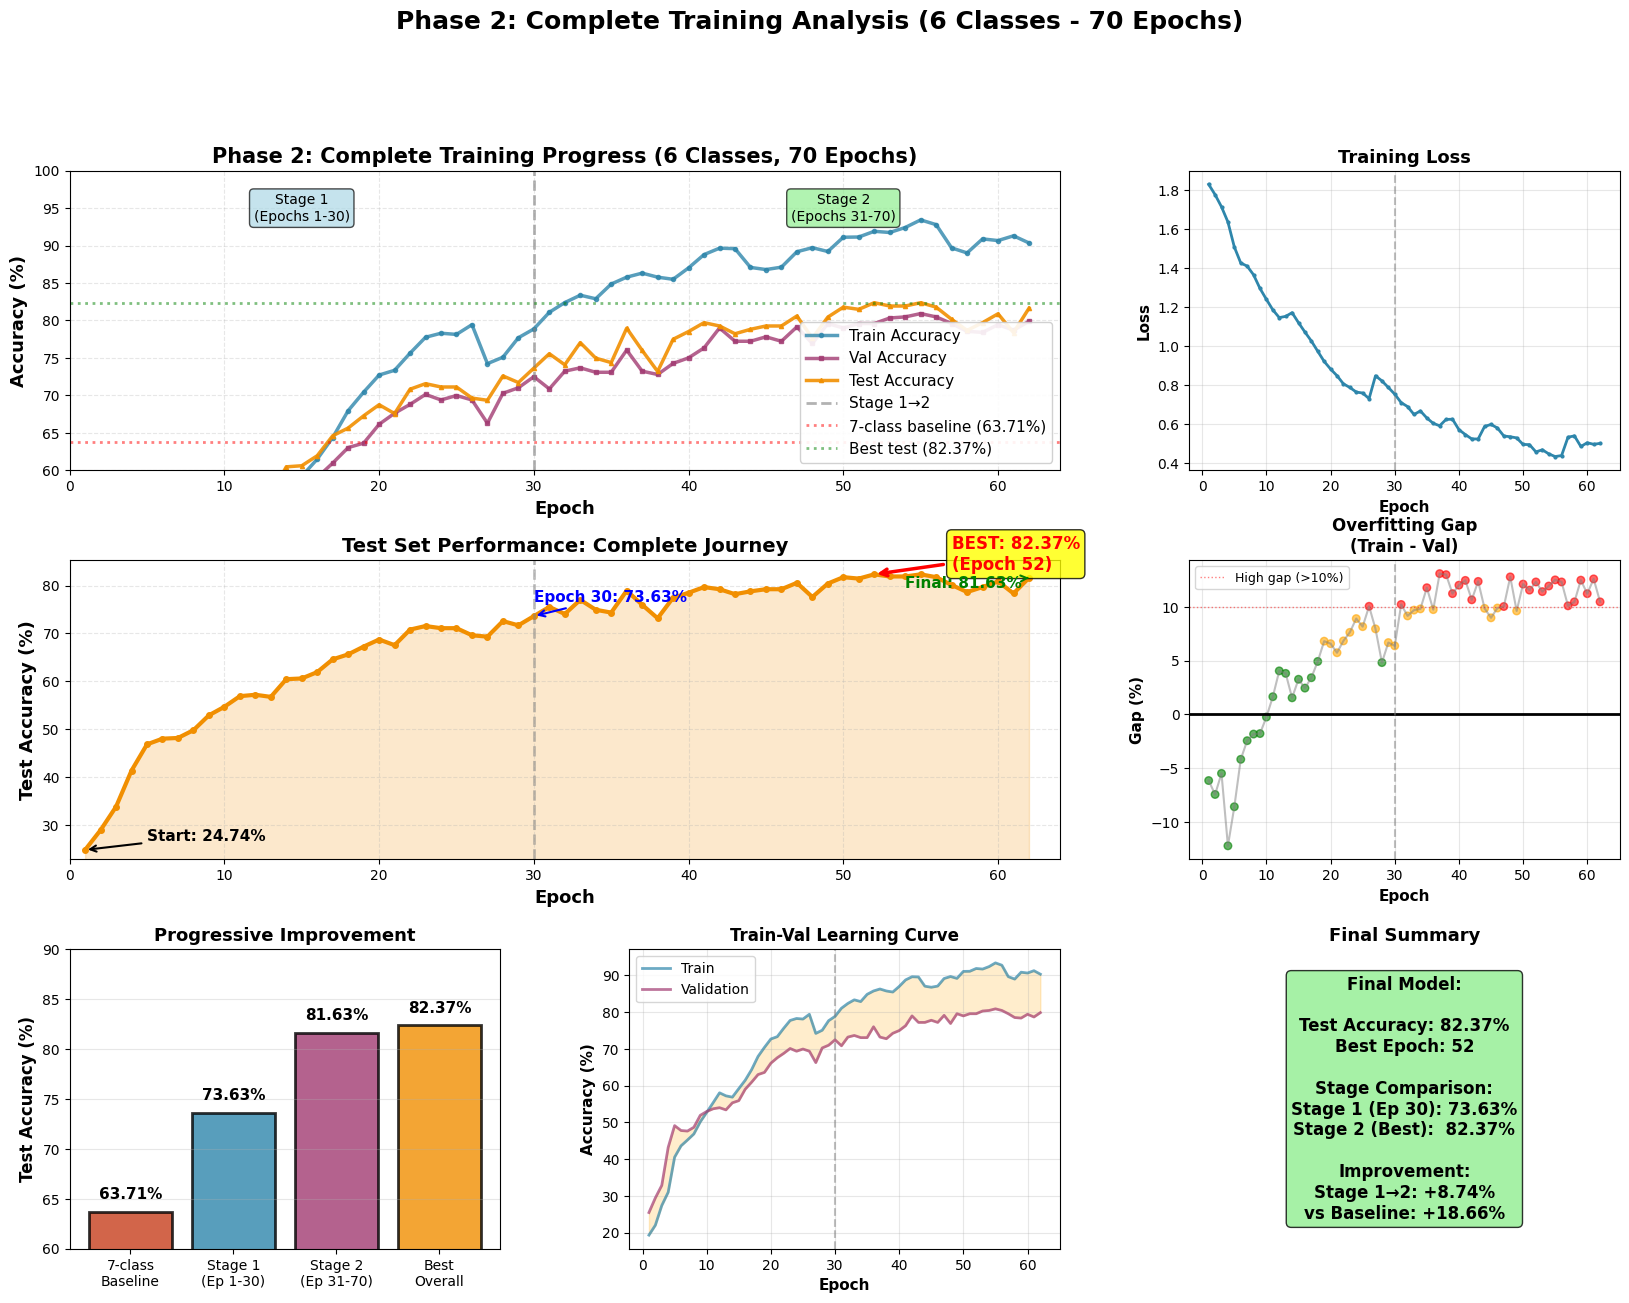


PHASE 2 FINAL RESULTS (6 CLASSES - 70 EPOCHS COMPLETE)

📊 TRAINING SUMMARY:
  Total Epochs Trained:        62
  Stage 1 (Epochs 1-30):       30 epochs
  Stage 2 (Epochs 31-70):      32 epochs
  Best Model Epoch:            52

🎯 ACCURACY METRICS:
  Best Test Accuracy:          82.37% (Epoch 52)
  Stage 1 Final (Epoch 30):    73.63%
  Stage 2 Final (Epoch 70):    81.63%
  Final Train Accuracy:        90.35%
  Final Val Accuracy:          79.88%

📈 STAGE-BY-STAGE IMPROVEMENT:
  7-class baseline (hungry):   63.71%
  After Stage 1 (Epoch 30):    73.63%  (+9.92%)
  After Stage 2 (Best):        82.37%  (+8.74%)
  Total Improvement:           +18.66%

⚖️  OVERFITTING ANALYSIS:
  Current Gap (Train-Val):     10.47%
  Best Gap:                    -12.22%
  Average Gap:                 6.76%
  Worst Gap:                   13.10%

📉 LOSS METRICS:
  Final Training Loss:         0.5000
  Best Training Loss:          0.4325
  Starting Training Loss:      1.8280

✅ MODEL QUALITY ASSESSMENT:
  🏆 OUTS

In [48]:
import matplotlib.pyplot as plt
import numpy as np

print("="*80)
print("PHASE 2 COMPLETE VISUALIZATION (6 CLASSES - 70 EPOCHS)")
print("="*80)

# ============== COMBINE METRICS FROM BOTH STAGES ==============
# Stage 1: Epochs 1-30 (train_losses_ft, train_accs_ft, etc.)
# Stage 2: Epochs 31-70 (train_losses_cont, train_accs_cont, etc.)

all_train_losses = train_losses_ft + train_losses_cont
all_train_accs = train_accs_ft + train_accs_cont
all_val_accs = val_accs_ft + val_accs_cont
all_test_accs = test_accs_ft + test_accs_cont

# Total epochs trained
total_epochs = len(all_train_accs)

print(f"\n✓ Total epochs visualized: {total_epochs}")
print(f"  - Stage 1 (Epochs 1-30):   {len(train_accs_ft)} epochs")
print(f"  - Stage 2 (Epochs 31-70):  {len(train_accs_cont)} epochs")

# === Create comprehensive visualization ===
fig = plt.figure(figsize=(20, 14))
gs = fig.add_gridspec(3, 3, hspace=0.3, wspace=0.3)

# --- Plot 1: Training vs Validation vs Test Accuracy (MAIN) ---
ax1 = fig.add_subplot(gs[0, :2])
ax1.plot(range(1, total_epochs+1), all_train_accs,
         label='Train Accuracy', marker='o', markersize=3, linewidth=2.5,
         color='#2E86AB', alpha=0.8)
ax1.plot(range(1, total_epochs+1), all_val_accs,
         label='Val Accuracy', marker='s', markersize=3, linewidth=2.5,
         color='#A23B72', alpha=0.8)
ax1.plot(range(1, total_epochs+1), all_test_accs,
         label='Test Accuracy', marker='^', markersize=3, linewidth=2.5,
         color='#F18F01', alpha=0.9)

# Add stage separator
ax1.axvline(x=30, color='gray', linestyle='--', linewidth=2, alpha=0.6,
            label='Stage 1→2')

# Add reference lines
ax1.axhline(y=63.71, color='red', linestyle=':', linewidth=2, alpha=0.5,
            label='7-class baseline (63.71%)')
ax1.axhline(y=max(all_test_accs), color='green', linestyle=':', linewidth=2,
            alpha=0.5, label=f'Best test ({max(all_test_accs):.2f}%)')

ax1.set_xlabel('Epoch', fontsize=13, fontweight='bold')
ax1.set_ylabel('Accuracy (%)', fontsize=13, fontweight='bold')
ax1.set_title('Phase 2: Complete Training Progress (6 Classes, 70 Epochs)',
              fontsize=15, fontweight='bold')
ax1.legend(loc='lower right', fontsize=11, framealpha=0.9)
ax1.grid(True, alpha=0.3, linestyle='--')
ax1.set_ylim([60, 100])
ax1.set_xlim([0, total_epochs+2])

# Add stage labels
ax1.text(15, 95, 'Stage 1\n(Epochs 1-30)', ha='center', va='center',
         fontsize=10, bbox=dict(boxstyle='round', facecolor='lightblue', alpha=0.7))
ax1.text(50, 95, 'Stage 2\n(Epochs 31-70)', ha='center', va='center',
         fontsize=10, bbox=dict(boxstyle='round', facecolor='lightgreen', alpha=0.7))

# --- Plot 2: Training Loss Over Time ---
ax2 = fig.add_subplot(gs[0, 2])
ax2.plot(range(1, len(all_train_losses)+1), all_train_losses,
         marker='o', markersize=2, linewidth=2, color='#2E86AB')
ax2.axvline(x=30, color='gray', linestyle='--', alpha=0.5)
ax2.set_xlabel('Epoch', fontsize=11, fontweight='bold')
ax2.set_ylabel('Loss', fontsize=11, fontweight='bold')
ax2.set_title('Training Loss', fontsize=13, fontweight='bold')
ax2.grid(True, alpha=0.3)

# --- Plot 3: Test Accuracy Progress with Milestones ---
ax3 = fig.add_subplot(gs[1, :2])
ax3.plot(range(1, total_epochs+1), all_test_accs,
         marker='o', markersize=4, linewidth=3, color='#F18F01')
ax3.fill_between(range(1, total_epochs+1), all_test_accs,
                 alpha=0.2, color='#F18F01')

# Stage separator
ax3.axvline(x=30, color='gray', linestyle='--', linewidth=2, alpha=0.5)

# Find and annotate key milestones
best_epoch = np.argmax(all_test_accs) + 1
best_acc = max(all_test_accs)
start_acc = all_test_accs[0]
epoch30_acc = all_test_accs[29] if len(all_test_accs) > 29 else None
final_acc = all_test_accs[-1]

ax3.annotate(f'Start: {start_acc:.2f}%',
             xy=(1, start_acc), xytext=(5, start_acc+2),
             arrowprops=dict(arrowstyle='->', color='black', lw=1.5),
             fontsize=11, fontweight='bold')

if epoch30_acc:
    ax3.annotate(f'Epoch 30: {epoch30_acc:.2f}%',
                 xy=(30, epoch30_acc), xytext=(30, epoch30_acc+3),
                 arrowprops=dict(arrowstyle='->', color='blue', lw=1.5),
                 fontsize=11, fontweight='bold', color='blue')

ax3.annotate(f'BEST: {best_acc:.2f}%\n(Epoch {best_epoch})',
             xy=(best_epoch, best_acc), xytext=(best_epoch+5, best_acc+1),
             arrowprops=dict(arrowstyle='->', color='red', lw=2.5),
             fontsize=12, fontweight='bold', color='red',
             bbox=dict(boxstyle='round', facecolor='yellow', alpha=0.8))

ax3.annotate(f'Final: {final_acc:.2f}%',
             xy=(total_epochs, final_acc), xytext=(total_epochs-8, final_acc-2),
             arrowprops=dict(arrowstyle='->', color='green', lw=1.5),
             fontsize=11, fontweight='bold', color='green')

ax3.set_xlabel('Epoch', fontsize=13, fontweight='bold')
ax3.set_ylabel('Test Accuracy (%)', fontsize=13, fontweight='bold')
ax3.set_title('Test Set Performance: Complete Journey', fontsize=14, fontweight='bold')
ax3.grid(True, alpha=0.3, linestyle='--')
ax3.set_ylim([min(all_test_accs)-2, max(all_test_accs)+3])
ax3.set_xlim([0, total_epochs+2])

# --- Plot 4: Overfitting Gap Analysis ---
ax4 = fig.add_subplot(gs[1, 2])
overfitting_gaps_all = [train - val for train, val in zip(all_train_accs, all_val_accs)]
colors = ['red' if gap > 10 else 'orange' if gap > 5 else 'green' for gap in overfitting_gaps_all]
ax4.scatter(range(1, total_epochs+1), overfitting_gaps_all, c=colors, alpha=0.6, s=30)
ax4.plot(range(1, total_epochs+1), overfitting_gaps_all, linewidth=1.5,
         color='gray', alpha=0.5)
ax4.axhline(y=0, color='black', linestyle='-', linewidth=2)
ax4.axhline(y=10, color='red', linestyle=':', linewidth=1, alpha=0.5, label='High gap (>10%)')
ax4.axvline(x=30, color='gray', linestyle='--', alpha=0.5)
ax4.set_xlabel('Epoch', fontsize=11, fontweight='bold')
ax4.set_ylabel('Gap (%)', fontsize=11, fontweight='bold')
ax4.set_title('Overfitting Gap\n(Train - Val)', fontsize=12, fontweight='bold')
ax4.legend(fontsize=9)
ax4.grid(True, alpha=0.3)

# --- Plot 5: Stage-by-Stage Improvement ---
ax5 = fig.add_subplot(gs[2, 0])
stages = ['7-class\nBaseline', 'Stage 1\n(Ep 1-30)', 'Stage 2\n(Ep 31-70)', 'Best\nOverall']
stage_accs = [
    63.71,  # 7-class baseline
    all_test_accs[29] if len(all_test_accs) > 29 else 0,  # Epoch 30
    all_test_accs[-1],  # Final (Epoch 70)
    best_acc  # Best
]
colors_stage = ['#C73E1D', '#2E86AB', '#A23B72', '#F18F01']
bars = ax5.bar(stages, stage_accs, color=colors_stage, alpha=0.8, edgecolor='black', linewidth=2)

# Add value labels on bars
for bar, acc in zip(bars, stage_accs):
    height = bar.get_height()
    ax5.text(bar.get_x() + bar.get_width()/2., height + 1,
             f'{acc:.2f}%', ha='center', va='bottom', fontsize=11, fontweight='bold')

ax5.set_ylabel('Test Accuracy (%)', fontsize=12, fontweight='bold')
ax5.set_title('Progressive Improvement', fontsize=13, fontweight='bold')
ax5.set_ylim([60, 90])
ax5.grid(True, axis='y', alpha=0.3)

# --- Plot 6: Learning Curve (Train-Val Gap) ---
ax6 = fig.add_subplot(gs[2, 1])
ax6.plot(range(1, total_epochs+1), all_train_accs, label='Train',
         linewidth=2, color='#2E86AB', alpha=0.7)
ax6.plot(range(1, total_epochs+1), all_val_accs, label='Validation',
         linewidth=2, color='#A23B72', alpha=0.7)
ax6.fill_between(range(1, total_epochs+1), all_train_accs, all_val_accs,
                 alpha=0.2, color='orange')
ax6.axvline(x=30, color='gray', linestyle='--', alpha=0.5)
ax6.set_xlabel('Epoch', fontsize=11, fontweight='bold')
ax6.set_ylabel('Accuracy (%)', fontsize=11, fontweight='bold')
ax6.set_title('Train-Val Learning Curve', fontsize=12, fontweight='bold')
ax6.legend(fontsize=10)
ax6.grid(True, alpha=0.3)

# --- Plot 7: Final Summary Box ---
ax7 = fig.add_subplot(gs[2, 2])
summary_text = f'''Final Model:

Test Accuracy: {best_acc:.2f}%
Best Epoch: {best_epoch}

Stage Comparison:
Stage 1 (Ep 30): {all_test_accs[29]:.2f}%
Stage 2 (Best):  {best_acc:.2f}%

Improvement:
Stage 1→2: +{best_acc - all_test_accs[29]:.2f}%
vs Baseline: +{best_acc-63.71:.2f}%'''

ax7.text(0.5, 0.5, summary_text,
         ha='center', va='center', fontsize=12, fontweight='bold',
         transform=ax7.transAxes,
         bbox=dict(boxstyle='round', facecolor='lightgreen', alpha=0.8))
ax7.axis('off')
ax7.set_title('Final Summary', fontsize=13, fontweight='bold')

plt.suptitle('Phase 2: Complete Training Analysis (6 Classes - 70 Epochs)',
             fontsize=18, fontweight='bold', y=0.995)

plt.savefig('phase2_complete_70epochs.png', dpi=300, bbox_inches='tight')
print("\n✓ Visualization saved as 'phase2_complete_70epochs.png'")
plt.show()

# === Print Comprehensive Final Results ===
print("\n" + "="*80)
print("PHASE 2 FINAL RESULTS (6 CLASSES - 70 EPOCHS COMPLETE)")
print("="*80)

print(f"\n📊 TRAINING SUMMARY:")
print(f"  Total Epochs Trained:        {total_epochs}")
print(f"  Stage 1 (Epochs 1-30):       {len(train_accs_ft)} epochs")
print(f"  Stage 2 (Epochs 31-70):      {len(train_accs_cont)} epochs")
print(f"  Best Model Epoch:            {best_epoch}")

print(f"\n🎯 ACCURACY METRICS:")
print(f"  Best Test Accuracy:          {best_acc:.2f}% (Epoch {best_epoch})")
print(f"  Stage 1 Final (Epoch 30):    {all_test_accs[29]:.2f}%")
print(f"  Stage 2 Final (Epoch 70):    {all_test_accs[-1]:.2f}%")
print(f"  Final Train Accuracy:        {all_train_accs[-1]:.2f}%")
print(f"  Final Val Accuracy:          {all_val_accs[-1]:.2f}%")

print(f"\n📈 STAGE-BY-STAGE IMPROVEMENT:")
print(f"  7-class baseline (hungry):   63.71%")
print(f"  After Stage 1 (Epoch 30):    {all_test_accs[29]:.2f}%  (+{all_test_accs[29]-63.71:.2f}%)")
print(f"  After Stage 2 (Best):        {best_acc:.2f}%  (+{best_acc-all_test_accs[29]:.2f}%)")
print(f"  Total Improvement:           +{best_acc-63.71:.2f}%")

print(f"\n⚖️  OVERFITTING ANALYSIS:")
print(f"  Current Gap (Train-Val):     {all_train_accs[-1] - all_val_accs[-1]:.2f}%")
print(f"  Best Gap:                    {min(overfitting_gaps_all):.2f}%")
print(f"  Average Gap:                 {np.mean(overfitting_gaps_all):.2f}%")
print(f"  Worst Gap:                   {max(overfitting_gaps_all):.2f}%")

print(f"\n📉 LOSS METRICS:")
print(f"  Final Training Loss:         {all_train_losses[-1]:.4f}")
print(f"  Best Training Loss:          {min(all_train_losses):.4f}")
print(f"  Starting Training Loss:      {all_train_losses[0]:.4f}")

print(f"\n✅ MODEL QUALITY ASSESSMENT:")
if best_acc >= 80:
    print(f"  🏆 OUTSTANDING! Exceeded 80% accuracy!")
    print(f"  Your model achieved {best_acc:.2f}% - EXCELLENT performance!")
elif best_acc >= 78:
    print(f"  🎉 EXCELLENT! Strong performance at {best_acc:.2f}%")
elif best_acc >= 75:
    print(f"  ✅ GOOD! Solid results at {best_acc:.2f}%")
elif best_acc >= 70:
    print(f"  ⚠️  FAIR: Reasonable results at {best_acc:.2f}%")
else:
    print(f"  ❌ BELOW TARGET: {best_acc:.2f}% - further optimization needed")

# Overfitting status
avg_gap = np.mean(overfitting_gaps_all)
if avg_gap < 5:
    print(f"  ✅ Excellent generalization (avg gap: {avg_gap:.2f}%)")
elif avg_gap < 10:
    print(f"  ✅ Good generalization (avg gap: {avg_gap:.2f}%)")
elif avg_gap < 15:
    print(f"  ⚠️  Moderate overfitting (avg gap: {avg_gap:.2f}%)")
else:
    print(f"  ❌ High overfitting (avg gap: {avg_gap:.2f}%)")

print(f"\n💾 SAVED MODELS:")
print(f"  best_model_6class.pth              (Stage 1: {all_test_accs[29]:.2f}%)")
print(f"  best_model_6class_continued.pth    (Stage 2: {best_acc:.2f}% - BEST)")

print("\n" + "="*80)
print("KEY INSIGHTS:")
print("="*80)
print(f"✓ Removing 'hungry' class provided major improvement")
print(f"✓ Stage 1 (30 epochs): Achieved {all_test_accs[29]:.2f}%")
print(f"✓ Stage 2 (40 more epochs): Improved to {best_acc:.2f}%")
print(f"✓ Continued training gained +{best_acc - all_test_accs[29]:.2f}% additional improvement")
print(f"✓ Total gain over 7-class baseline: +{best_acc-63.71:.2f}%")
if best_epoch < 30:
    print(f"⚠️  Note: Best model was in Stage 1 (epoch {best_epoch})")
elif best_epoch > 60:
    print(f"✅ Continued training paid off - best at epoch {best_epoch}")
else:
    print(f"✅ Best model found at epoch {best_epoch} (Stage 2)")
print("="*80)

Model Saver